# --------------------------------------------------------------------------------------------------
# ------------------------------ *Credit Risk Analysis* ------------------------------------
# --------------------------------------------------------------------------------------------------

In [1]:
!pip install jovian --upgrade 

  Found existing installation: jovian 0.1.82
    Uninstalling jovian-0.1.82:
      Successfully uninstalled jovian-0.1.82


In [2]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit()

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Creating a new notebook on https://jovian.ml/
[jovian] Please enter your API key ( from https://jovian.ml/ ):


In [2]:
import os #For access the working directory location and importing the data 
os.chdir('E:\\Imarticus Learning\\Capstone Project\\Python Project - Bank Lending')
os.getcwd()

'E:\\Imarticus Learning\\Capstone Project\\Python Project - Bank Lending'

### Importing Libreries

In [3]:
import pandas as pd  #For data preprocessing and to read the data
import numpy as np  #For linear algebra
import matplotlib.pyplot as plt  #For plotting 
import seaborn as sns  #For plotting 
import warnings
warnings.filterwarnings("ignore")


### Importing Dataset  from Text file

In [4]:
dataset=pd.read_csv('XYZCorp_LendingData.txt',sep="\t", low_memory=False)

In [5]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [6]:
# Checking Dimensions of dataset
dataset.shape

(855969, 73)

In [7]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


### Creating a copy of dataset

In [8]:
dataset_backup=dataset.copy()
dataset_backup.shape

(855969, 73)

### Checking for duplicates

In [9]:
dataset.duplicated().value_counts()

False    855969
dtype: int64

### Preprocecing the data 

#### Find Missing (Null) Value and Calculating Missing Value Percentage.

In [10]:
Count_Null=dataset.isnull().sum()
print(Count_Null)

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64


In [11]:
Perc_Null =round(dataset.isnull().sum()/len(dataset) * 100,2)
print(Perc_Null)

id                   0.00
member_id            0.00
loan_amnt            0.00
funded_amnt          0.00
funded_amnt_inv      0.00
                    ...  
total_rev_hi_lim     7.86
inq_fi              98.45
total_cu_tl         98.45
inq_last_12m        98.45
default_ind          0.00
Length: 73, dtype: float64


In [12]:
Missing_Val= pd.DataFrame({'count':Count_Null,'% Count':Perc_Null})
print(Missing_Val)

                   count  % Count
id                     0     0.00
member_id              0     0.00
loan_amnt              0     0.00
funded_amnt            0     0.00
funded_amnt_inv        0     0.00
...                  ...      ...
total_rev_hi_lim   67313     7.86
inq_fi            842681    98.45
total_cu_tl       842681    98.45
inq_last_12m      842681    98.45
default_ind            0     0.00

[73 rows x 2 columns]


#### The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but we can use 30%.

In [13]:
#Dropping the variables which have more than 30% of null values.
print(dataset.shape)
dataset = dataset.loc[:,dataset.isnull().sum()/len(dataset) <.30 ]
print(dataset.shape)

(855969, 73)
(855969, 52)


### Dropping some features based on some Domain Knowledge.

In [14]:
dataset.drop(['id','member_id','sub_grade','emp_title','title','zip_code','addr_state','earliest_cr_line','inq_last_6mths',
                          'last_pymnt_d','next_pymnt_d','last_credit_pull_d','pymnt_plan','policy_code'],axis=1,inplace=True)
print(dataset.shape)

(855969, 38)


In [15]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

### Let us check how many object type features are actually Categorical

In [14]:
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
purpose                 14
initial_list_status      2
application_type         2
dtype: int64

In [15]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

###### Categorizing data into categorical, continuous and count data.

Categorical: 'term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'initial_list_status', 'application_type'

Continuous: 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 
    'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

Count:

### Filling null values

In [16]:
# For collections_12_mths_ex_med column.
print(dataset.collections_12_mths_ex_med.isnull().sum())
dataset['collections_12_mths_ex_med'].fillna(dataset['collections_12_mths_ex_med'].median(),inplace=True)
print(dataset.collections_12_mths_ex_med.isnull().sum())

56
0


In [17]:
# For tot_coll_amt column.
print(dataset.tot_coll_amt.isnull().sum())
dataset['tot_coll_amt'].fillna(dataset['tot_coll_amt'].mean(),inplace=True)
print(dataset.tot_coll_amt.isnull().sum())

67313
0


In [18]:
# For tot_cur_bal column.
print(dataset.tot_cur_bal.isnull().sum())
dataset['tot_cur_bal'].fillna(dataset['tot_cur_bal'].mean(),inplace=True)
print(dataset.tot_cur_bal.isnull().sum())

67313
0


In [19]:
# For total_rev_hi_lim column.
print(dataset.total_rev_hi_lim.isnull().sum())
dataset['total_rev_hi_lim'].fillna(dataset['total_rev_hi_lim'].mean(),inplace=True)
print(dataset.total_rev_hi_lim.isnull().sum())

67313
0


In [20]:
# For total_rev_hi_lim column.
print(dataset.revol_util.isnull().sum())
dataset['revol_util'].fillna(dataset['revol_util'].mean(),inplace=True)
print(dataset.revol_util.isnull().sum())

446
0


In [21]:
dataset.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee          

### Univariate Analysis

###### Dependent variable

0    809502
1     46467
Name: default_ind, dtype: int64


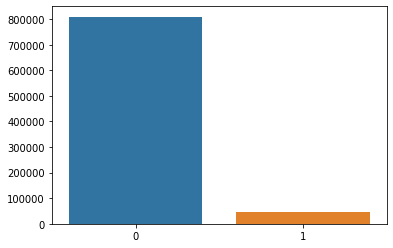

In [22]:
dependent_count=dataset['default_ind'].value_counts()
print(dependent_count)
sns.barplot(dependent_count.index, dependent_count.values)

Thus, We can conclude that this is class imbalance problem.


---

##### Emp_length 

Emp_length is Employment length in Years. Possible values are whole numbers from 0 and higher. Null indicates that they are  not employed.
So null values have been translated to 0.


In [23]:
emp_length_count=dataset['emp_length'].value_counts()
print(emp_length_count)

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64


10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
0             43061
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64


[Text(0, 0, '10+ years'),
 Text(0, 0, '2 years'),
 Text(0, 0, '< 1 year'),
 Text(0, 0, '3 years'),
 Text(0, 0, '1 year'),
 Text(0, 0, '5 years'),
 Text(0, 0, '4 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '0'),
 Text(0, 0, '8 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '9 years')]

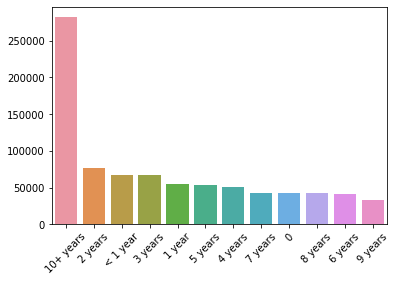

In [24]:
dataset['emp_length'] = dataset['emp_length'].fillna(0)
emp_lenght_counts=dataset['emp_length'].value_counts()
print(emp_lenght_counts)
g=sns.barplot(emp_lenght_counts.index,emp_lenght_counts.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [25]:
dataset.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collecti

##### Grade status

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64


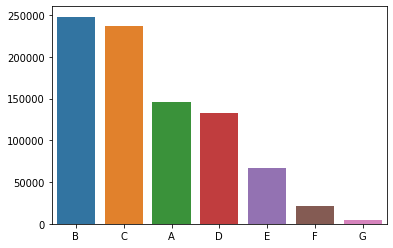

In [26]:
grade_count=dataset['grade'].value_counts()
print(grade_count)
sns.barplot(grade_count.index, grade_count.values)

##### Home_ownership

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64


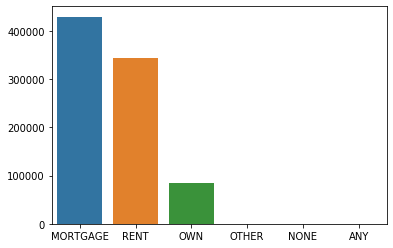

In [27]:
home_ownership_count=dataset['home_ownership'].value_counts()
print(home_ownership_count)
sns.barplot(home_ownership_count.index,home_ownership_count.values)

##### verification

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64


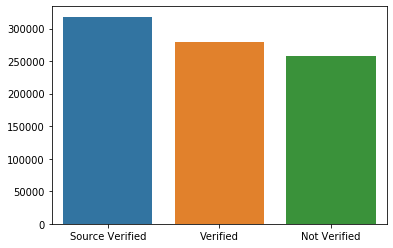

In [28]:

verification_status_count=dataset['verification_status'].value_counts()
print(verification_status_count)
sns.barplot(verification_status_count.index,verification_status_count.values)

##### purpose

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64


[Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'credit_card'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'other'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'car'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'educational')]

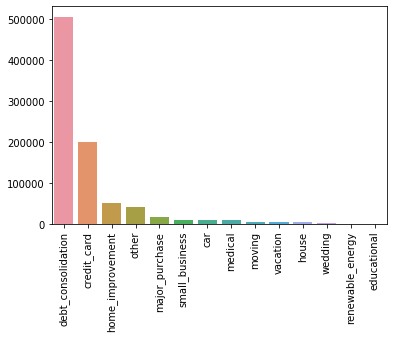

In [29]:

purpose_count=dataset['purpose'].value_counts()
print(purpose_count)
g=sns.barplot(purpose_count.index,purpose_count.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

##### status of initial list

f    442555
w    413414
Name: initial_list_status, dtype: int64


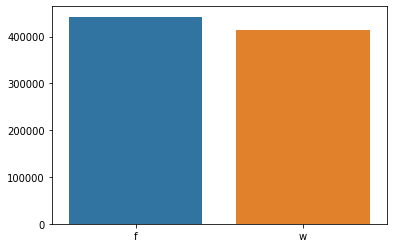

In [30]:

initial_list_count=dataset['initial_list_status'].value_counts()
print(initial_list_count)
sns.barplot(initial_list_count.index,initial_list_count.values)


###### status of application type 

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


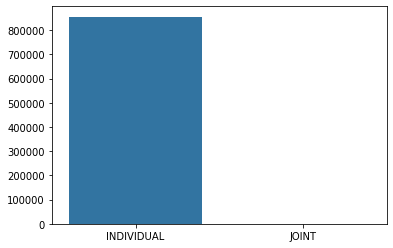

In [31]:
application_type_count=dataset['application_type'].value_counts()
print(application_type_count)
sns.barplot(application_type_count.index,application_type_count.values)

contains 'INDIVIDUAL' level for 99.94% of the records. so i'm dropping this variable.

In [32]:
dataset.drop(['application_type'],axis=1,inplace=True)

##### Term

 36 months    600221
 60 months    255748
Name: term, dtype: int64


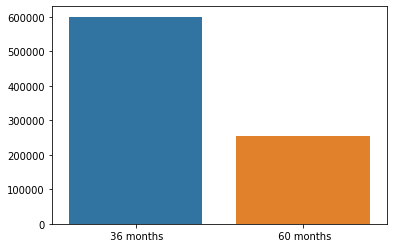

In [33]:
term_count=dataset['term'].value_counts()

print(term_count)

sns.barplot(term_count.index,term_count.values)

##### acc_now_delinq

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64


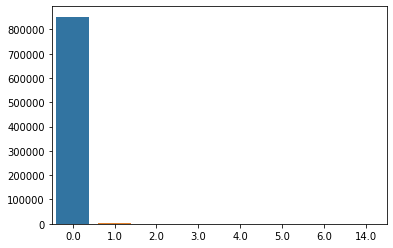

In [34]:
acc_now_delinq_count=dataset['acc_now_delinq'].value_counts()

print(acc_now_delinq_count)

sns.barplot(acc_now_delinq_count.index,acc_now_delinq_count.values)

In [35]:
dataset.drop(['acc_now_delinq'],axis=1,inplace=True)

##### collections_12_mths_ex_med

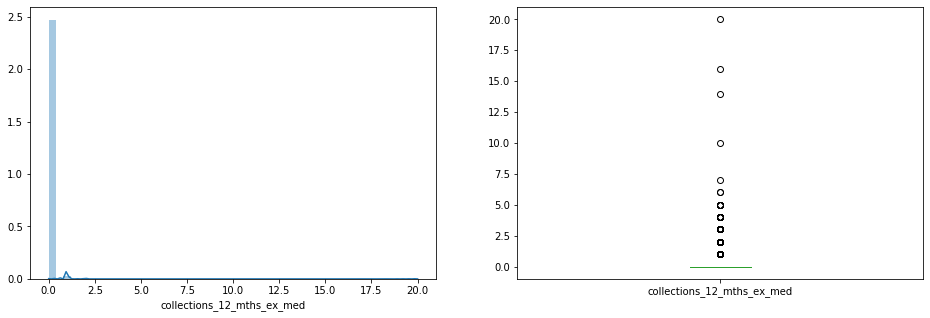

In [36]:

plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['collections_12_mths_ex_med']);

plt.subplot(122)
dataset['collections_12_mths_ex_med'].plot.box(figsize=(16,5))

plt.show()

In [37]:
# Outlires treatment

#Find mean of the column "collections_12_mths_ex_med"
collections_12_mths_ex_med_mean = int(dataset['collections_12_mths_ex_med'].mean())

#FInd 75th Percentile of the column "collections_12_mths_ex_med"
IQR_collections_12_mths_ex_med_P75 = dataset['collections_12_mths_ex_med'].quantile(q=0.75)

#FInd 25th Percentile of the column "collections_12_mths_ex_med"
IQR_collections_12_mths_ex_med_P25 = dataset['collections_12_mths_ex_med'].quantile(q=0.25)

#FInd IQR of the column "collections_12_mths_ex_med"
IQR_collections_12_mths_ex_med = IQR_collections_12_mths_ex_med_P75-IQR_collections_12_mths_ex_med_P25

#Fix boundaries to detect outliers in column "collections_12_mths_ex_med"
IQR_LL = int(IQR_collections_12_mths_ex_med_P25 - 1.5*IQR_collections_12_mths_ex_med)
IQR_UL = int(IQR_collections_12_mths_ex_med_P75 + 1.5*IQR_collections_12_mths_ex_med)


#treating upper end outier with mean
dataset.loc[dataset['collections_12_mths_ex_med']>IQR_UL , 'collections_12_mths_ex_med'] = collections_12_mths_ex_med_mean

#treating lower end outlier as mean
dataset.loc[dataset['collections_12_mths_ex_med']<IQR_LL , 'collections_12_mths_ex_med'] = collections_12_mths_ex_med_mean


##### loan_amnt

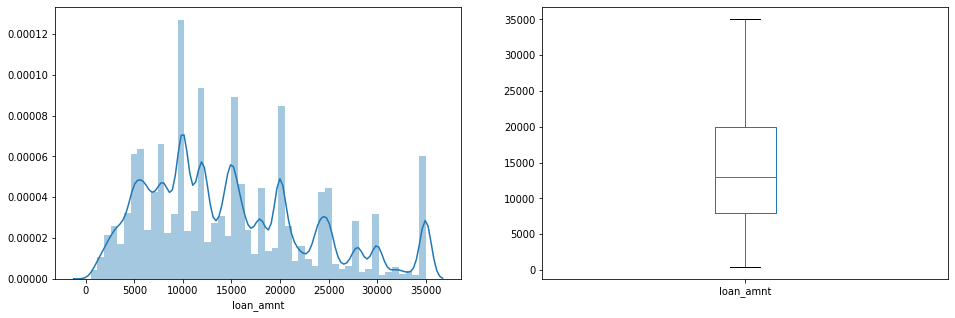

In [38]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['loan_amnt']);

plt.subplot(122)
dataset['loan_amnt'].plot.box(figsize=(16,5))

plt.show()

##### funded_amnt

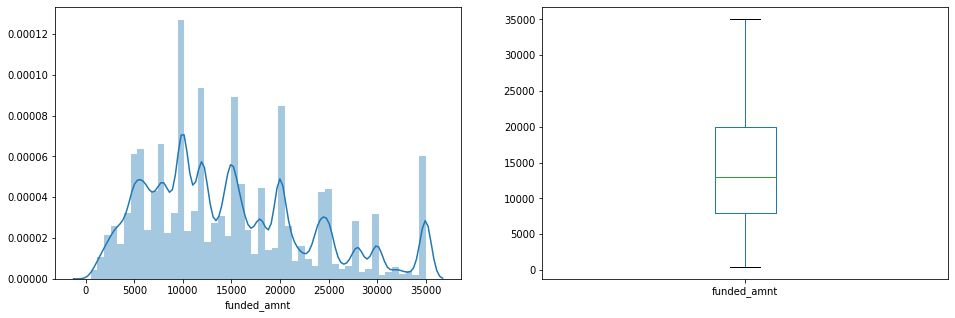

In [39]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['funded_amnt']);

plt.subplot(122)
dataset['funded_amnt'].plot.box(figsize=(16,5))

plt.show()

##### funded_amnt_inv

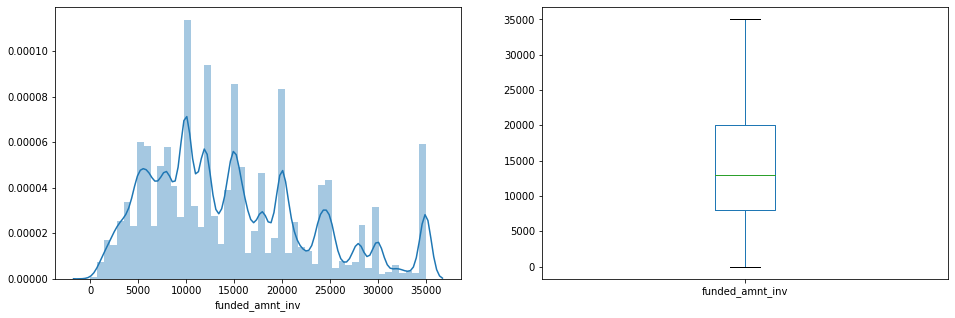

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['funded_amnt_inv']);

plt.subplot(122)
dataset['funded_amnt_inv'].plot.box(figsize=(16,5))

plt.show()

##### int_rate

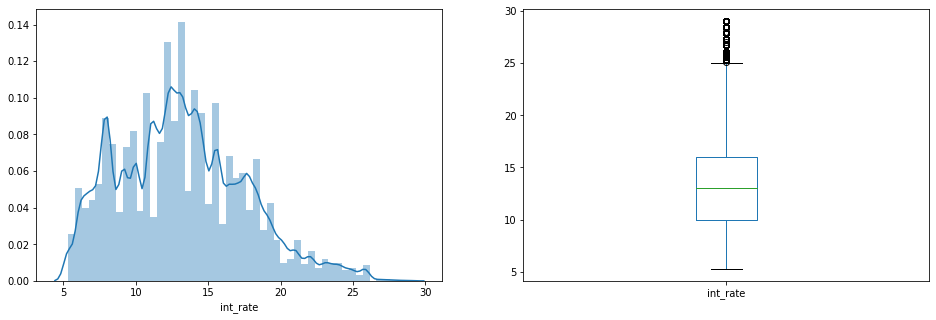

In [41]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['int_rate']);

plt.subplot(122)
dataset['int_rate'].plot.box(figsize=(16,5))

plt.show()

In [42]:
#Outliers treatment.
#Find mean of the column "duration"
int_rate_mean = int(dataset['int_rate'].mean())

#FInd 75th Percentile of the column "duration"
IQR_int_rate_P75 = dataset['int_rate'].quantile(q=0.75)

#FInd 25th Percentile of the column "duration"
IQR_int_rate_P25 = dataset['int_rate'].quantile(q=0.25)

#FInd IQR of the column "duration"
IQR_int_rate = IQR_int_rate_P75-IQR_int_rate_P25

#Fix boundaries to detect outliers in column "duration"
IQR_LL = int(IQR_int_rate_P25 - 1.5*IQR_int_rate)
IQR_UL = int(IQR_int_rate_P75 + 1.5*IQR_int_rate)

#treating upper end outier with mean
dataset.loc[dataset['int_rate']>IQR_UL , 'int_rate'] = int_rate_mean

#treating lower end outlier as mean
dataset.loc[dataset['int_rate']<IQR_LL , 'int_rate'] = int_rate_mean


##### installment

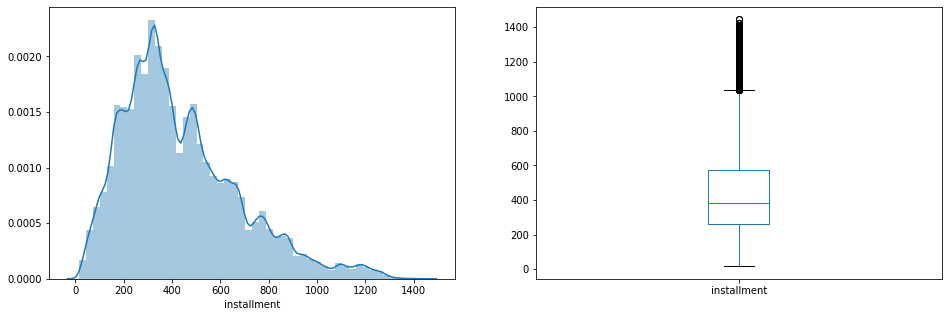

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['installment']);

plt.subplot(122)
dataset['installment'].plot.box(figsize=(16,5))

plt.show()

In [44]:
#Find mean of the column "duration"
installment_mean = int(dataset['installment'].mean())

#FInd 75th Percentile of the column "duration"
IQR_installment_P75 = dataset['installment'].quantile(q=0.75)

#FInd 25th Percentile of the column "duration"
IQR_installment_P25 = dataset['installment'].quantile(q=0.25)

#FInd IQR of the column "duration"
IQR_installment = IQR_installment_P75-IQR_installment_P25

#Fix boundaries to detect outliers in column "duration"
IQR_LL = int(IQR_installment_P25 - 1.5*IQR_installment)
IQR_UL = int(IQR_installment_P75 + 1.5*IQR_installment)

#treating upper end outier with mean
dataset.loc[dataset['installment']>IQR_UL , 'installment'] = installment_mean

#treating lower end outlier as mean
dataset.loc[dataset['installment']<IQR_LL , 'installment'] = installment_mean


##### annual_inc

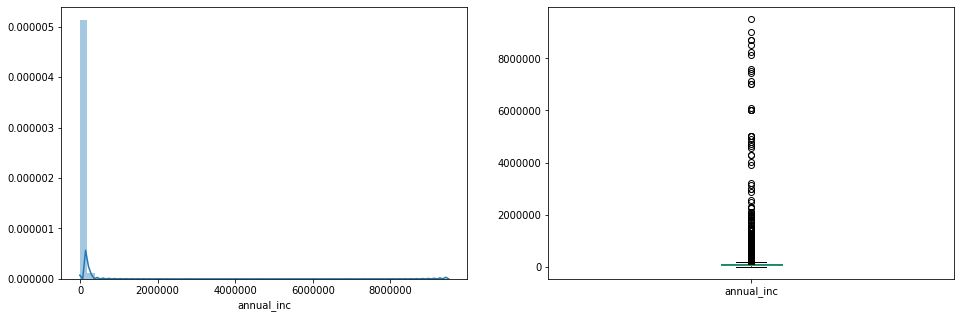

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['annual_inc']);

plt.subplot(122)
dataset['annual_inc'].plot.box(figsize=(16,5))

plt.show()

In [46]:
# Outliers Treatment
#Find mean of the column "duration"
annual_inc_mean = int(dataset['annual_inc'].mean())

#FInd 75th Percentile of the column "duration"
IQR_annual_inc_P75 = dataset['annual_inc'].quantile(q=0.75)

#FInd 25th Percentile of the column "duration"
IQR_annual_inc_P25 = dataset['annual_inc'].quantile(q=0.25)

#FInd IQR of the column "duration"
IQR_annual_inc = IQR_annual_inc_P75-IQR_annual_inc_P25

#Fix boundaries to detect outliers in column "duration"
IQR_LL = int(IQR_annual_inc_P25 - 1.5*IQR_annual_inc)
IQR_UL = int(IQR_annual_inc_P75 + 1.5*IQR_annual_inc)

#treating upper end outier with mean
dataset.loc[dataset['annual_inc']>IQR_UL , 'annual_inc'] = annual_inc_mean

#treating lower end outlier as mean
dataset.loc[dataset['annual_inc']<IQR_LL , 'annual_inc'] = annual_inc_mean


##### dti

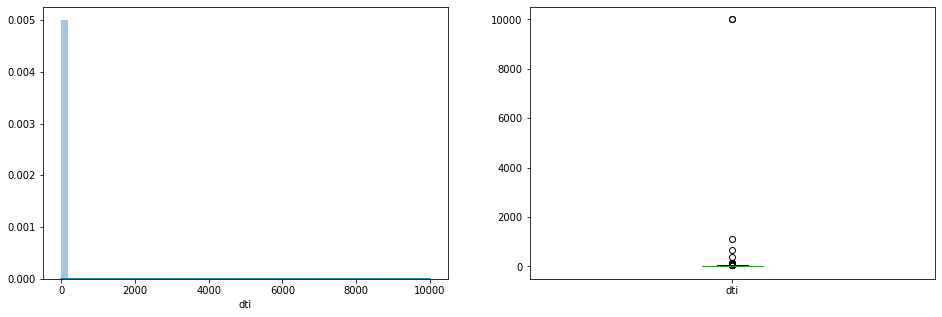

In [47]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['dti']);

plt.subplot(122)
dataset['dti'].plot.box(figsize=(16,5))

plt.show()

In [48]:
# Outliers Treatment
#Find mean of the column "dti"
dti_mean = int(dataset['dti'].mean())

#FInd 75th Percentile of the column "dti"
IQR_dti_P75 = dataset['dti'].quantile(q=0.75)

#FInd 25th Percentile of the column "dti"
IQR_dti_P25 = dataset['dti'].quantile(q=0.25)

#FInd IQR of the column "dti"
IQR_dti = IQR_dti_P75-IQR_dti_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_dti_P25 - 1.5*IQR_dti)
IQR_UL = int(IQR_dti_P75 + 1.5*IQR_dti)

#treating upper end outier with mean
dataset.loc[dataset['dti']>IQR_UL , 'dti'] = dti_mean

#treating lower end outlier as mean
dataset.loc[dataset['dti']<IQR_LL , 'dti'] = dti_mean


##### delinq_2yrs

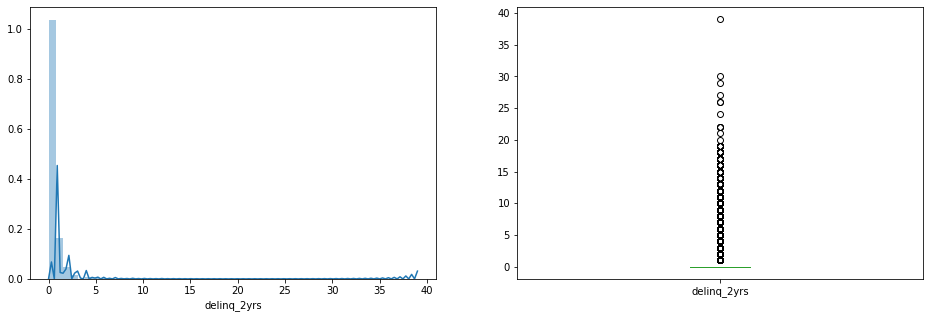

In [49]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['delinq_2yrs']);

plt.subplot(122)
dataset['delinq_2yrs'].plot.box(figsize=(16,5))

plt.show()

In [50]:
# Outliers Treatment
#Find mean of the column "delinq_2yrs"
delinq_2yrs_mean = int(dataset['delinq_2yrs'].mean())

#FInd 75th Percentile of the column "delinq_2yrs"
IQR_delinq_2yrs_P75 = dataset['delinq_2yrs'].quantile(q=0.75)

#FInd 25th Percentile of the column "delinq_2yrs"
IQR_delinq_2yrs_P25 = dataset['delinq_2yrs'].quantile(q=0.25)

#FInd IQR of the column "dti"
IQR_delinq_2yrs = IQR_delinq_2yrs_P75-IQR_delinq_2yrs_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_delinq_2yrs_P25 - 1.5*IQR_delinq_2yrs)
IQR_UL = int(IQR_delinq_2yrs_P75 + 1.5*IQR_delinq_2yrs)

#treating upper end outier with mean
dataset.loc[dataset['delinq_2yrs']>IQR_UL , 'delinq_2yrs'] = dti_mean

#treating lower end outlier as mean
dataset.loc[dataset['delinq_2yrs']<IQR_LL , 'delinq_2yrs'] = dti_mean


##### open_acc

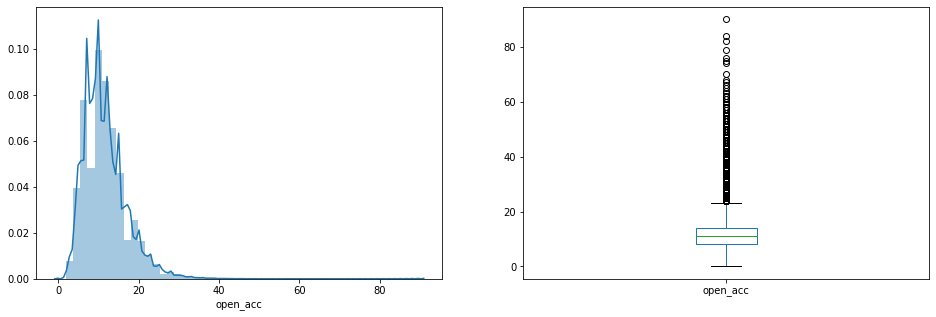

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['open_acc']);

plt.subplot(122)
dataset['open_acc'].plot.box(figsize=(16,5))

plt.show()

In [52]:
# Outliers Treatment
#Find mean of the column "open_acc"
open_acc_mean = int(dataset['open_acc'].mean())

#FInd 75th Percentile of the column "open_acc"
IQR_open_acc_P75 = dataset['open_acc'].quantile(q=0.75)

#FInd 25th Percentile of the column "open_acc"
IQR_open_acc_P25 = dataset['open_acc'].quantile(q=0.25)

#FInd IQR of the column "open_acc"
IQR_open_acc = IQR_open_acc_P75-IQR_open_acc_P25

#Fix boundaries to detect outliers in column "open_acc"
IQR_LL = int(IQR_open_acc_P25 - 1.5*IQR_open_acc)
IQR_UL = int(IQR_open_acc_P75 + 1.5*IQR_open_acc)

#treating upper end outier with mean
dataset.loc[dataset['open_acc']>IQR_UL , 'open_acc'] = open_acc_mean

#treating lower end outlier as mean
dataset.loc[dataset['open_acc']<IQR_LL , 'open_acc'] = open_acc_mean


##### pub_rec

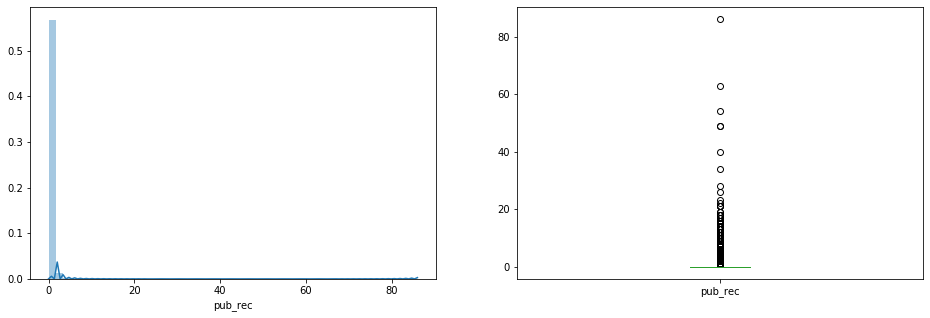

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['pub_rec']);

plt.subplot(122)
dataset['pub_rec'].plot.box(figsize=(16,5))

plt.show()

In [54]:
# Outliers Treatment
#Find mean of the column "pub_rec"
pub_rec_mean = int(dataset['pub_rec'].mean())

#FInd 75th Percentile of the column "pub_rec"
IQR_pub_rec_P75 = dataset['pub_rec'].quantile(q=0.75)

#FInd 25th Percentile of the column "pub_rec"
IQR_pub_rec_P25 = dataset['pub_rec'].quantile(q=0.25)

#FInd IQR of the column "pub_rec"
IQR_pub_rec = IQR_pub_rec_P75-IQR_pub_rec_P25

#Fix boundaries to detect outliers in column "pub_rec"
IQR_LL = int(IQR_pub_rec_P25 - 1.5*IQR_pub_rec)
IQR_UL = int(IQR_pub_rec_P75 + 1.5*IQR_pub_rec)

#treating upper end outier with mean
dataset.loc[dataset['pub_rec']>IQR_UL , 'pub_rec'] = pub_rec_mean

#treating lower end outlier as mean
dataset.loc[dataset['pub_rec']<IQR_LL , 'pub_rec'] = pub_rec_mean


##### revol_bal

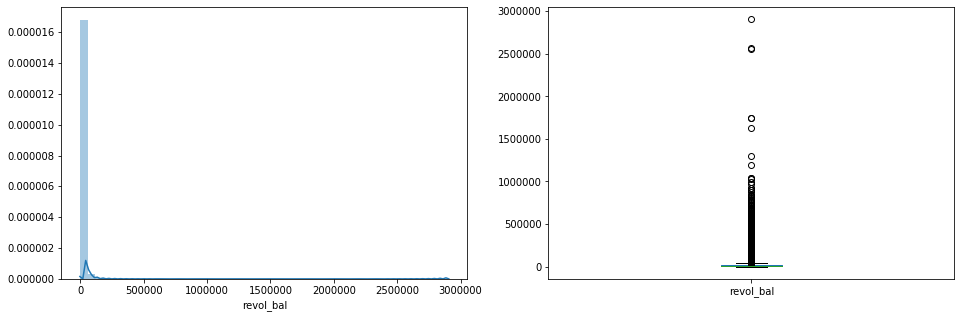

In [55]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['revol_bal']);

plt.subplot(122)
dataset['revol_bal'].plot.box(figsize=(16,5))

plt.show()

In [56]:
# Outliers Treatment
#Find mean of the column "revol_bal"
revol_bal_mean = int(dataset['revol_bal'].mean())

#FInd 75th Percentile of the column "revol_bal"
IQR_revol_bal_P75 = dataset['revol_bal'].quantile(q=0.75)

#FInd 25th Percentile of the column "revol_bal"
IQR_revol_bal_P25 = dataset['revol_bal'].quantile(q=0.25)

#FInd IQR of the column "revol_bal"
IQR_revol_bal = IQR_revol_bal_P75-IQR_revol_bal_P25

#Fix boundaries to detect outliers in column "revol_bal"
IQR_LL = int(IQR_revol_bal_P25 - 1.5*IQR_revol_bal)
IQR_UL = int(IQR_revol_bal_P75 + 1.5*IQR_revol_bal)

#treating upper end outier with mean
dataset.loc[dataset['revol_bal']>IQR_UL , 'revol_bal'] = revol_bal_mean

#treating lower end outlier as mean
dataset.loc[dataset['revol_bal']<IQR_LL , 'revol_bal'] = revol_bal_mean


##### revol_util

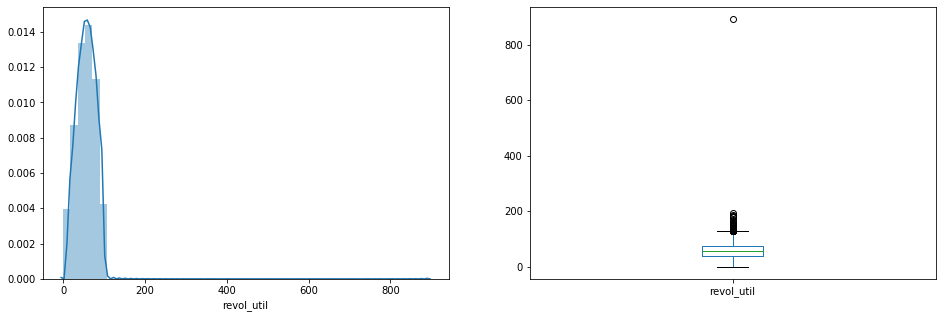

In [57]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['revol_util']);

plt.subplot(122)
dataset['revol_util'].plot.box(figsize=(16,5))

plt.show()

In [58]:
# Outliers Treatment
#Find mean of the column "revol_util"
revol_util_mean = int(dataset['revol_util'].mean())

#FInd 75th Percentile of the column "revol_util"
IQR_revol_util_P75 = dataset['revol_util'].quantile(q=0.75)

#FInd 25th Percentile of the column "revol_util"
IQR_revol_util_P25 = dataset['revol_util'].quantile(q=0.25)

#FInd IQR of the column "revol_util"
IQR_revol_util = IQR_revol_util_P75-IQR_revol_util_P25

#Fix boundaries to detect outliers in column "revol_util"
IQR_LL = int(IQR_revol_util_P25 - 1.5*IQR_revol_util)
IQR_UL = int(IQR_revol_util_P75 + 1.5*IQR_revol_util)

#treating upper end outier with mean
dataset.loc[dataset['revol_util']>IQR_UL , 'revol_util'] = revol_util_mean

#treating lower end outlier as mean
dataset.loc[dataset['revol_util']<IQR_LL , 'revol_util'] = revol_util_mean


##### total_acc

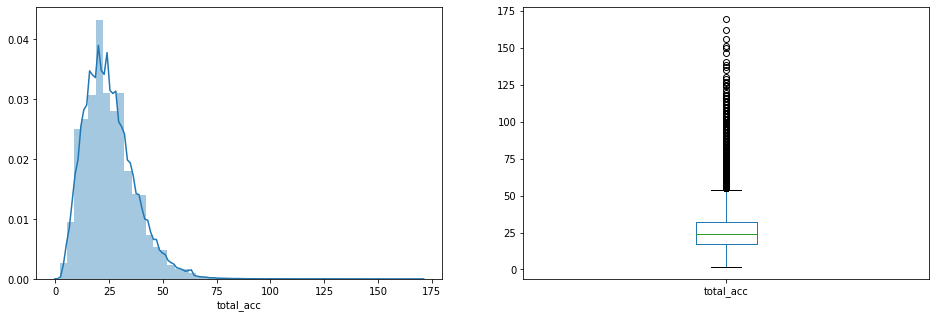

In [59]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_acc']);

plt.subplot(122)
dataset['total_acc'].plot.box(figsize=(16,5))

plt.show()

In [60]:
# Outliers Treatment
#Find mean of the column "total_acc"
total_acc_mean = int(dataset['total_acc'].mean())

#FInd 75th Percentile of the column "total_acc"
IQR_total_acc_P75 = dataset['total_acc'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_acc"
IQR_total_acc_P25 = dataset['total_acc'].quantile(q=0.25)

#FInd IQR of the column "total_acc"
IQR_total_acc = IQR_total_acc_P75-IQR_total_acc_P25

#Fix boundaries to detect outliers in column "total_acc"
IQR_LL = int(IQR_total_acc_P25 - 1.5*IQR_total_acc)
IQR_UL = int(IQR_total_acc_P75 + 1.5*IQR_total_acc)

#treating upper end outier with mean
dataset.loc[dataset['total_acc']>IQR_UL , 'total_acc'] = total_acc_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_acc']<IQR_LL , 'total_acc'] = total_acc_mean


##### out_prncp

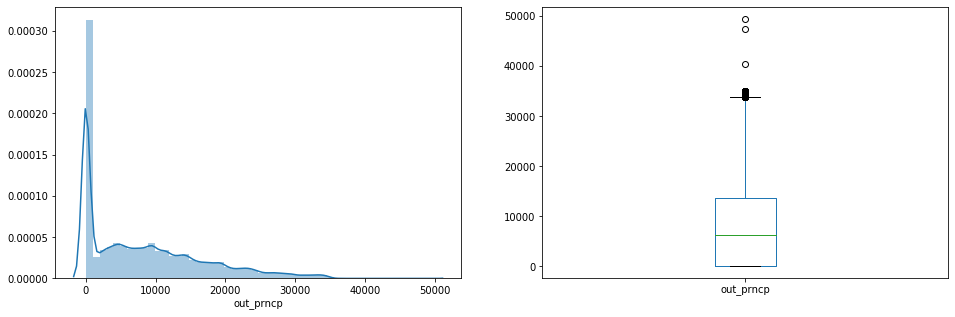

In [61]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['out_prncp']);

plt.subplot(122)
dataset['out_prncp'].plot.box(figsize=(16,5))

plt.show()

In [62]:
# Outliers Treatment
#Find mean of the column "out_prncp"
out_prncp_mean = int(dataset['out_prncp'].mean())

#FInd 75th Percentile of the column "out_prncp"
IQR_out_prncp_P75 = dataset['out_prncp'].quantile(q=0.75)

#FInd 25th Percentile of the column "out_prncp"
IQR_out_prncp_P25 = dataset['out_prncp'].quantile(q=0.25)

#FInd IQR of the column "out_prncp"
IQR_out_prncp = IQR_out_prncp_P75-IQR_out_prncp_P25

#Fix boundaries to detect outliers in column "out_prncp"
IQR_LL = int(IQR_out_prncp_P25 - 1.5*IQR_out_prncp)
IQR_UL = int(IQR_out_prncp_P75 + 1.5*IQR_out_prncp)

#treating upper end outier with mean
dataset.loc[dataset['out_prncp']>IQR_UL , 'out_prncp'] = out_prncp_mean

#treating lower end outlier as mean
dataset.loc[dataset['out_prncp']<IQR_LL , 'out_prncp'] = out_prncp_mean


##### out_prncp_inv

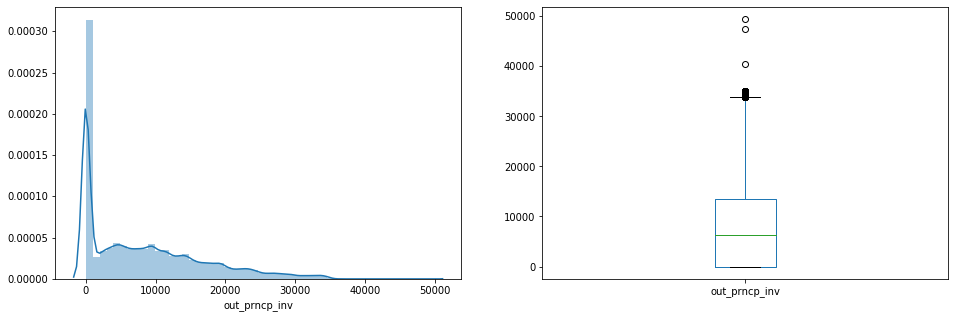

In [63]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['out_prncp_inv']);

plt.subplot(122)
dataset['out_prncp_inv'].plot.box(figsize=(16,5))

plt.show()

In [64]:
# Outliers Treatment
#Find mean of the column "out_prncp_inv"
out_prncp_inv_mean = int(dataset['out_prncp_inv'].mean())

#FInd 75th Percentile of the column "out_prncp_inv"
IQR_out_prncp_inv_P75 = dataset['out_prncp_inv'].quantile(q=0.75)

#FInd 25th Percentile of the column "out_prncp_inv"
IQR_out_prncp_inv_P25 = dataset['out_prncp_inv'].quantile(q=0.25)

#FInd IQR of the column "out_prncp_inv"
IQR_out_prncp_inv = IQR_out_prncp_inv_P75-IQR_out_prncp_inv_P25

#Fix boundaries to detect outliers in column "out_prncp_inv"
IQR_LL = int(IQR_out_prncp_inv_P25 - 1.5*IQR_out_prncp_inv)
IQR_UL = int(IQR_out_prncp_inv_P75 + 1.5*IQR_out_prncp_inv)


#treating upper end outier with mean
dataset.loc[dataset['out_prncp_inv']>IQR_UL , 'out_prncp_inv'] = out_prncp_inv_mean

#treating lower end outlier as mean
dataset.loc[dataset['out_prncp_inv']<IQR_LL , 'out_prncp_inv'] = out_prncp_inv_mean


##### total_pymnt

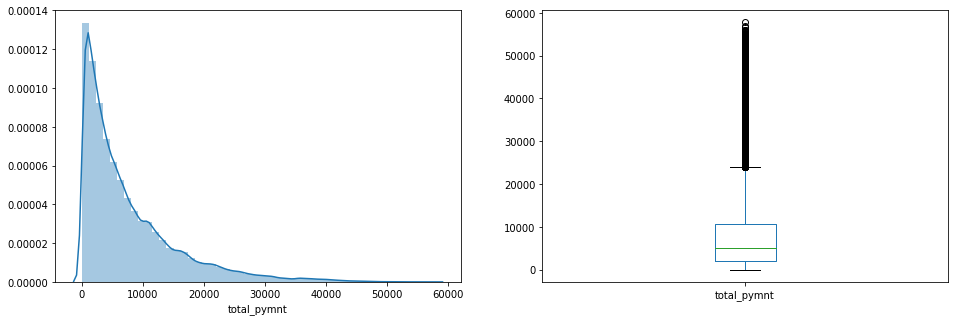

In [65]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_pymnt']);

plt.subplot(122)
dataset['total_pymnt'].plot.box(figsize=(16,5))

plt.show()

In [66]:
# Outliers Treatment
#Find mean of the column "total_pymnt"
total_pymnt_mean = int(dataset['total_pymnt'].mean())

#FInd 75th Percentile of the column "total_pymnt"
IQR_total_pymnt_P75 = dataset['total_pymnt'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_pymnt"
IQR_total_pymnt_P25 = dataset['total_pymnt'].quantile(q=0.25)

#FInd IQR of the column "total_pymnt"
IQR_total_pymnt = IQR_total_pymnt_P75-IQR_total_pymnt_P25

#Fix boundaries to detect outliers in column "total_pymnt"
IQR_LL = int(IQR_total_pymnt_P25 - 1.5*IQR_total_pymnt)
IQR_UL = int(IQR_total_pymnt_P75 + 1.5*IQR_total_pymnt)

#treating upper end outier with mean
dataset.loc[dataset['total_pymnt']>IQR_UL , 'total_pymnt'] = total_pymnt_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_pymnt']<IQR_LL , 'total_pymnt'] = total_pymnt_mean


##### total_pymnt_inv

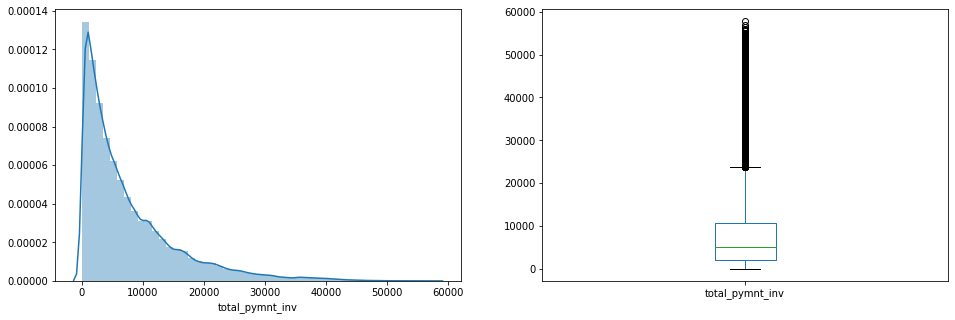

In [67]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_pymnt_inv']);

plt.subplot(122)
dataset['total_pymnt_inv'].plot.box(figsize=(16,5))

plt.show()

In [68]:
# Outliers Treatment
#Find mean of the column "total_pymnt_inv"
total_pymnt_inv_mean = int(dataset['total_pymnt_inv'].mean())

#FInd 75th Percentile of the column "total_pymnt_inv"
IQR_total_pymnt_inv_P75 = dataset['total_pymnt_inv'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_pymnt_inv"
IQR_total_pymnt_inv_P25 = dataset['total_pymnt_inv'].quantile(q=0.25)

#FInd IQR of the column "total_pymnt_inv"
IQR_total_pymnt_inv = IQR_total_pymnt_inv_P75-IQR_total_pymnt_inv_P25

#Fix boundaries to detect outliers in column "total_pymnt_inv"
IQR_LL = int(IQR_total_pymnt_inv_P25 - 1.5*IQR_total_pymnt_inv)
IQR_UL = int(IQR_total_pymnt_inv_P75 + 1.5*IQR_total_pymnt_inv)

#treating upper end outier with mean
dataset.loc[dataset['total_pymnt_inv']>IQR_UL , 'total_pymnt_inv'] = total_pymnt_inv_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_pymnt_inv']<IQR_LL , 'total_pymnt_inv'] = total_pymnt_inv_mean


##### total_rec_prncp

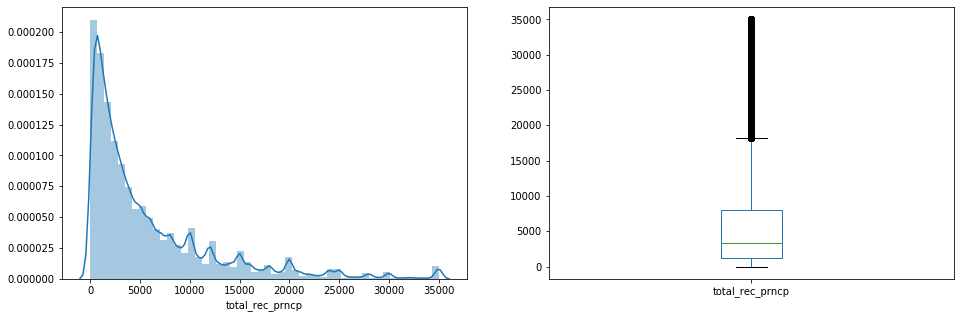

In [69]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_rec_prncp']);

plt.subplot(122)
dataset['total_rec_prncp'].plot.box(figsize=(16,5))

plt.show()

In [70]:
# Outliers Treatment
#Find mean of the column "total_rec_prncp"
total_rec_prncp_mean = int(dataset['total_rec_prncp'].mean())

#FInd 75th Percentile of the column "total_rec_prncp"
IQR_total_rec_prncp_P75 = dataset['total_rec_prncp'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_rec_prncp"
IQR_total_rec_prncp_P25 = dataset['total_rec_prncp'].quantile(q=0.25)

#FInd IQR of the column "total_rec_prncp"
IQR_total_rec_prncp = IQR_total_rec_prncp_P75-IQR_total_rec_prncp_P25

#Fix boundaries to detect outliers in column "total_rec_prncp"
IQR_LL = int(IQR_total_rec_prncp_P25 - 1.5*IQR_total_rec_prncp)
IQR_UL = int(IQR_total_rec_prncp_P75 + 1.5*IQR_total_rec_prncp)

#treating upper end outier with mean
dataset.loc[dataset['total_rec_prncp']>IQR_UL , 'total_rec_prncp'] = total_rec_prncp_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_rec_prncp']<IQR_LL , 'total_rec_prncp'] = total_rec_prncp_mean


##### total_rec_int

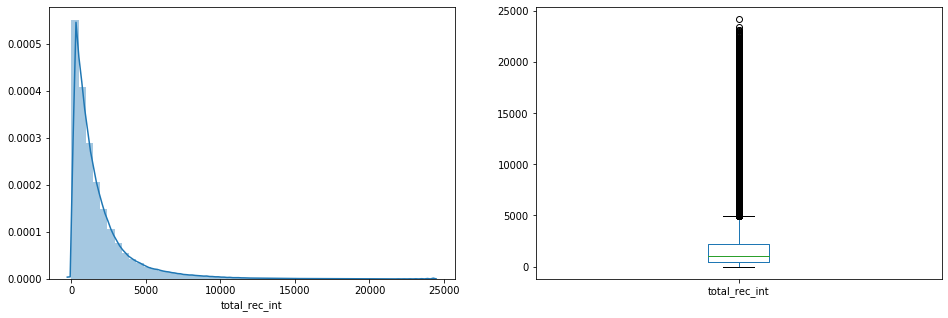

In [71]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_rec_int']);

plt.subplot(122)
dataset['total_rec_int'].plot.box(figsize=(16,5))

plt.show()

In [72]:
# Outliers Treatment
#Find mean of the column "total_rec_int"
total_rec_int_mean = int(dataset['total_rec_int'].mean())

#FInd 75th Percentile of the column "total_rec_int"
IQR_total_rec_int_P75 = dataset['total_rec_int'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_rec_int"
IQR_total_rec_int_P25 = dataset['total_rec_int'].quantile(q=0.25)

#FInd IQR of the column "total_rec_int"
IQR_total_rec_int = IQR_total_rec_int_P75-IQR_total_rec_int_P25

#Fix boundaries to detect outliers in column "total_rec_int"
IQR_LL = int(IQR_total_rec_int_P25 - 1.5*IQR_total_rec_int)
IQR_UL = int(IQR_total_rec_int_P75 + 1.5*IQR_total_rec_int)

#treating upper end outier with mean
dataset.loc[dataset['total_rec_int']>IQR_UL , 'total_rec_int'] = total_rec_int_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_rec_int']<IQR_LL , 'total_rec_int'] = total_rec_int_mean



##### total_rec_late_fee

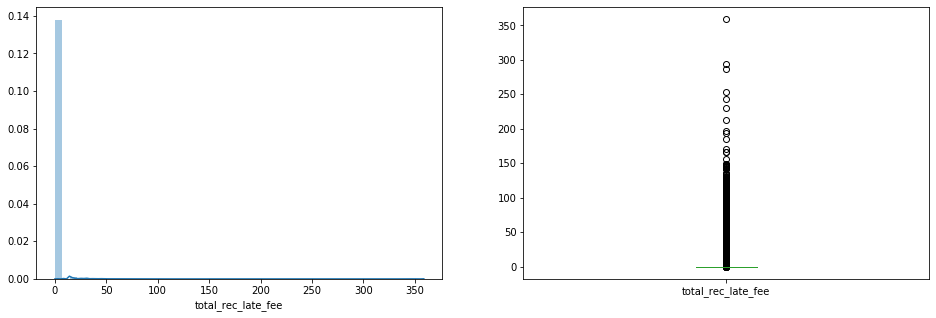

In [73]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_rec_late_fee']);

plt.subplot(122)
dataset['total_rec_late_fee'].plot.box(figsize=(16,5))

plt.show()

In [74]:
# Outliers Tretment
#Find mean of the column "total_rec_late_fee"
total_rec_late_fee_mean = int(dataset['total_rec_late_fee'].mean())

#FInd 75th Percentile of the column "total_rec_late_fee"
IQR_total_rec_late_fee_P75 = dataset['total_rec_late_fee'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_rec_int"
IQR_total_rec_late_fee_P25 = dataset['total_rec_late_fee'].quantile(q=0.25)

#FInd IQR of the column "total_rec_late_fee"
IQR_total_rec_late_fee = IQR_total_rec_late_fee_P75-IQR_total_rec_late_fee_P25

#Fix boundaries to detect outliers in column "total_rec_late_fee"
IQR_LL = int(IQR_total_rec_late_fee_P25 - 1.5*IQR_total_rec_late_fee)
IQR_UL = int(IQR_total_rec_late_fee_P75 + 1.5*IQR_total_rec_late_fee)

#treating upper end outier with mean
dataset.loc[dataset['total_rec_late_fee']>IQR_UL , 'total_rec_late_fee'] = total_rec_late_fee_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_rec_late_fee']<IQR_LL , 'total_rec_late_fee'] = total_rec_late_fee_mean


##### recoveries

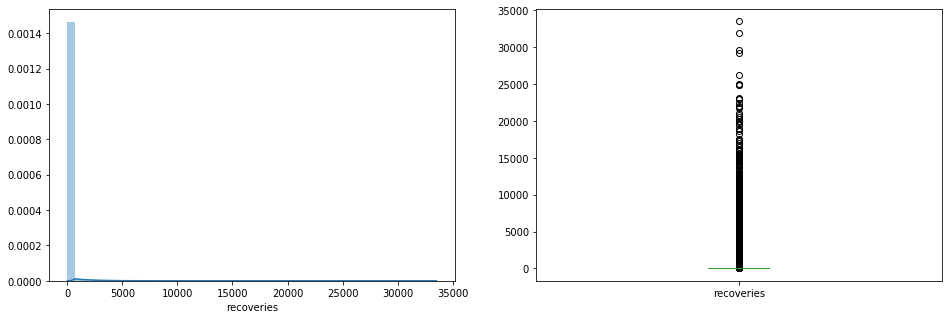

In [75]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['recoveries']);

plt.subplot(122)
dataset['recoveries'].plot.box(figsize=(16,5))

plt.show()

In [76]:
# Outliers Treatment
#Find mean of the column "recoveries"
recoveries_mean = int(dataset['recoveries'].mean())

#FInd 75th Percentile of the column "recoveries"
IQR_recoveries_P75 = dataset['recoveries'].quantile(q=0.75)

#FInd 25th Percentile of the column "recoveries"
IQR_recoveries_P25 = dataset['recoveries'].quantile(q=0.25)

#FInd IQR of the column "recoveries"
IQR_recoveries = IQR_recoveries_P75-IQR_recoveries_P25

#Fix boundaries to detect outliers in column "recoveries"
IQR_LL = int(IQR_recoveries_P25 - 1.5*IQR_recoveries)
IQR_UL = int(IQR_recoveries_P75 + 1.5*IQR_recoveries)

#treating upper end outier with mean
dataset.loc[dataset['recoveries']>IQR_UL , 'recoveries'] = recoveries_mean

#treating lower end outlier as mean
dataset.loc[dataset['recoveries']<IQR_LL , 'recoveries'] = recoveries_mean


##### collection_recovery_fee

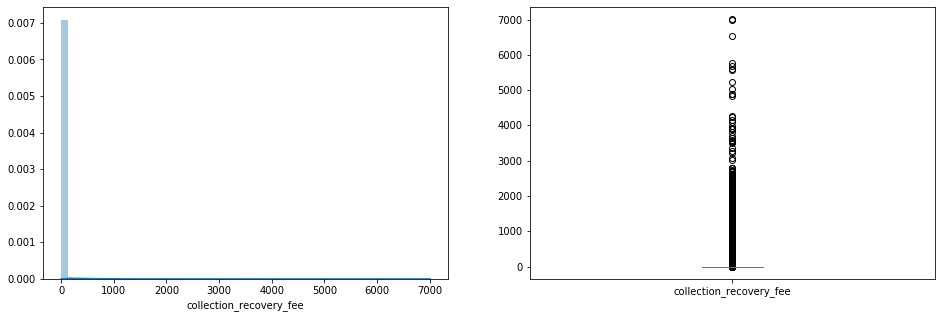

In [77]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['collection_recovery_fee']);

plt.subplot(122)
dataset['collection_recovery_fee'].plot.box(figsize=(16,5))

plt.show()

In [78]:
# Outliers Treatment
#Find mean of the column "collection_recovery_fee"
collection_recovery_fee_mean = int(dataset['collection_recovery_fee'].mean())

#FInd 75th Percentile of the column "collection_recovery_fee"
IQR_collection_recovery_fee_P75 = dataset['collection_recovery_fee'].quantile(q=0.75)

#FInd 25th Percentile of the column "collection_recovery_fee"
IQR_collection_recovery_fee_P25 = dataset['collection_recovery_fee'].quantile(q=0.25)

#FInd IQR of the column "collection_recovery_fee"
IQR_collection_recovery_fee = IQR_collection_recovery_fee_P75-IQR_collection_recovery_fee_P25

#Fix boundaries to detect outliers in column "collection_recovery_fee"
IQR_LL = int(IQR_collection_recovery_fee_P25 - 1.5*IQR_collection_recovery_fee)
IQR_UL = int(IQR_collection_recovery_fee_P75 + 1.5*IQR_collection_recovery_fee)

#treating upper end outier with mean
dataset.loc[dataset['collection_recovery_fee']>IQR_UL , 'collection_recovery_fee'] = collection_recovery_fee_mean

#treating lower end outlier as mean
dataset.loc[dataset['collection_recovery_fee']<IQR_LL , 'collection_recovery_fee'] = collection_recovery_fee_mean


##### last_pymnt_amnt

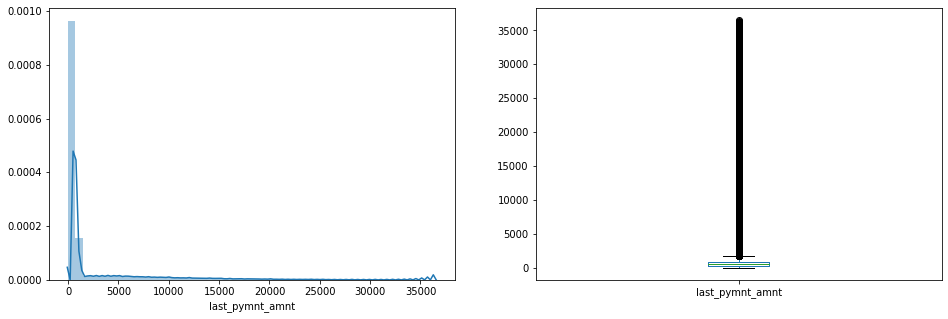

In [79]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['last_pymnt_amnt']);

plt.subplot(122)
dataset['last_pymnt_amnt'].plot.box(figsize=(16,5))

plt.show()

In [80]:
# Outliers Treatment
#Find mean of the column "last_pymnt_amnt"
last_pymnt_amnt_mean = int(dataset['last_pymnt_amnt'].mean())

#FInd 75th Percentile of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt_P75 = dataset['last_pymnt_amnt'].quantile(q=0.75)

#FInd 25th Percentile of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt_P25 = dataset['last_pymnt_amnt'].quantile(q=0.25)

#FInd IQR of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt = IQR_last_pymnt_amnt_P75-IQR_last_pymnt_amnt_P25

#Fix boundaries to detect outliers in column "last_pymnt_amnt"
IQR_LL = int(IQR_last_pymnt_amnt_P25 - 1.5*IQR_last_pymnt_amnt)
IQR_UL = int(IQR_last_pymnt_amnt_P75 + 1.5*IQR_last_pymnt_amnt)

#treating upper end outier with mean
dataset.loc[dataset['last_pymnt_amnt']>IQR_UL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean

#treating lower end outlier as mean
dataset.loc[dataset['last_pymnt_amnt']<IQR_LL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean


##### collections_12_mths_ex_med

##### tot_coll_amt

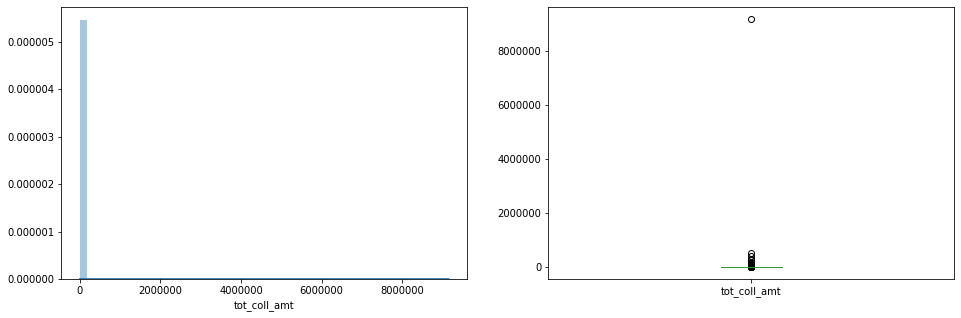

In [81]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['tot_coll_amt']);

plt.subplot(122)
dataset['tot_coll_amt'].plot.box(figsize=(16,5))

plt.show()

In [82]:
# Outliers Treatment
#Find mean of the column "tot_coll_amt"
tot_coll_amt_mean = int(dataset['tot_coll_amt'].mean())

#FInd 75th Percentile of the column "tot_coll_amt"
IQR_tot_coll_amt_P75 = dataset['tot_coll_amt'].quantile(q=0.75)

#FInd 25th Percentile of the column "tot_coll_amt"
IQR_tot_coll_amt_P25 = dataset['tot_coll_amt'].quantile(q=0.25)

#FInd IQR of the column "tot_coll_amt"
IQR_tot_coll_amt = IQR_tot_coll_amt_P75-IQR_tot_coll_amt_P25

#Fix boundaries to detect outliers in column "tot_coll_amt"
IQR_LL = int(IQR_tot_coll_amt_P25 - 1.5*IQR_tot_coll_amt)
IQR_UL = int(IQR_tot_coll_amt_P75 + 1.5*IQR_tot_coll_amt)

#treating upper end outier with mean
dataset.loc[dataset['tot_coll_amt']>IQR_UL , 'tot_coll_amt'] = tot_coll_amt_mean

#treating lower end outlier as mean
dataset.loc[dataset['tot_coll_amt']<IQR_LL , 'tot_coll_amt'] = tot_coll_amt_mean


##### tot_cur_bal

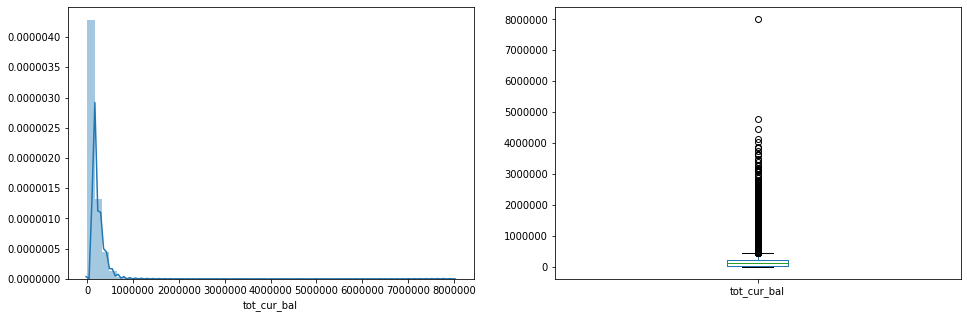

In [83]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['tot_cur_bal']);

plt.subplot(122)
dataset['tot_cur_bal'].plot.box(figsize=(16,5))

plt.show()

In [84]:
# Outliers Treatment
#Find mean of the column "tot_cur_bal"
tot_cur_bal_mean = int(dataset['tot_cur_bal'].mean())

#FInd 75th Percentile of the column "tot_cur_bal"
IQR_tot_cur_bal_P75 = dataset['tot_cur_bal'].quantile(q=0.75)

#FInd 25th Percentile of the column "tot_cur_bal"
IQR_tot_cur_bal_P25 = dataset['tot_cur_bal'].quantile(q=0.25)

#FInd IQR of the column "tot_cur_bal"
IQR_tot_cur_bal = IQR_tot_cur_bal_P75-IQR_tot_cur_bal_P25

#Fix boundaries to detect outliers in column "tot_cur_bal"
IQR_LL = int(IQR_tot_cur_bal_P25 - 1.5*IQR_tot_cur_bal)
IQR_UL = int(IQR_tot_cur_bal_P75 + 1.5*IQR_tot_cur_bal)

#treating upper end outier with mean
dataset.loc[dataset['tot_cur_bal']>IQR_UL , 'tot_cur_bal'] = tot_cur_bal_mean

#treating lower end outlier as mean
dataset.loc[dataset['tot_cur_bal']<IQR_LL , 'tot_cur_bal'] = tot_cur_bal_mean


##### total_rev_hi_lim

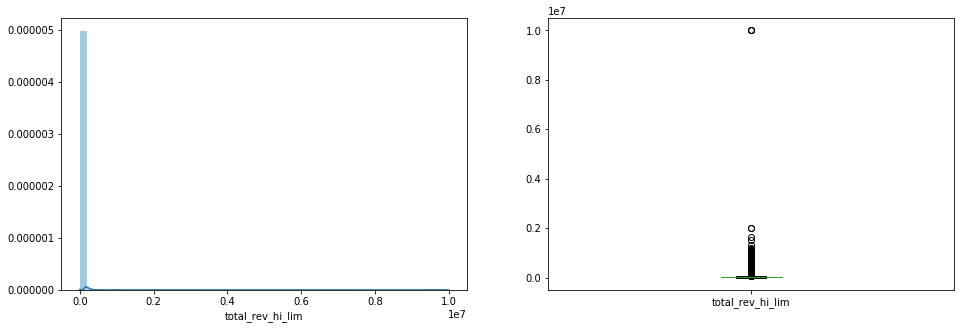

In [85]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset['total_rev_hi_lim']);

plt.subplot(122)
dataset['total_rev_hi_lim'].plot.box(figsize=(16,5))

plt.show()

In [86]:
# Outliers Treatment
#Find mean of the column "total_rev_hi_lim"
total_rev_hi_lim_mean = int(dataset['total_rev_hi_lim'].mean())

#FInd 75th Percentile of the column "total_rev_hi_lim"
IQR_total_rev_hi_lim_P75 = dataset['total_rev_hi_lim'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_rev_hi_lim"
IQR_total_rev_hi_lim_P25 = dataset['total_rev_hi_lim'].quantile(q=0.25)

#FInd IQR of the column "total_rev_hi_lim"
IQR_total_rev_hi_lim = IQR_total_rev_hi_lim_P75-IQR_total_rev_hi_lim_P25

#Fix boundaries to detect outliers in column "total_rev_hi_lim"
IQR_LL = int(IQR_total_rev_hi_lim_P25 - 1.5*IQR_total_rev_hi_lim)
IQR_UL = int(IQR_total_rev_hi_lim_P75 + 1.5*IQR_total_rev_hi_lim)

#treating upper end outier with mean
dataset.loc[dataset['total_rev_hi_lim']>IQR_UL , 'total_rev_hi_lim'] = total_rev_hi_lim_mean

#treating lower end outlier as mean
dataset.loc[dataset['total_rev_hi_lim']<IQR_LL , 'total_rev_hi_lim'] = total_rev_hi_lim_mean


In [87]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,861.07,0.0,0.0,0.0,171.62,0.0,225.0,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,435.17,0.0,47.0,4.0,119.66,0.0,225.0,139766.247529,32163.574526,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,603.65,0.0,0.0,0.0,649.91,0.0,225.0,139766.247529,32163.574526,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,2209.33,0.0,0.0,0.0,357.48,0.0,225.0,139766.247529,32163.574526,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,1009.07,0.0,0.0,0.0,67.79,0.0,225.0,139766.247529,32163.574526,0


In [88]:
# Categorizing Numeric and count data

dataset_numeric=dataset.loc[:,['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
      'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

In [17]:
len(dataset.columns)

38

### Heatmap For Multicolinearity

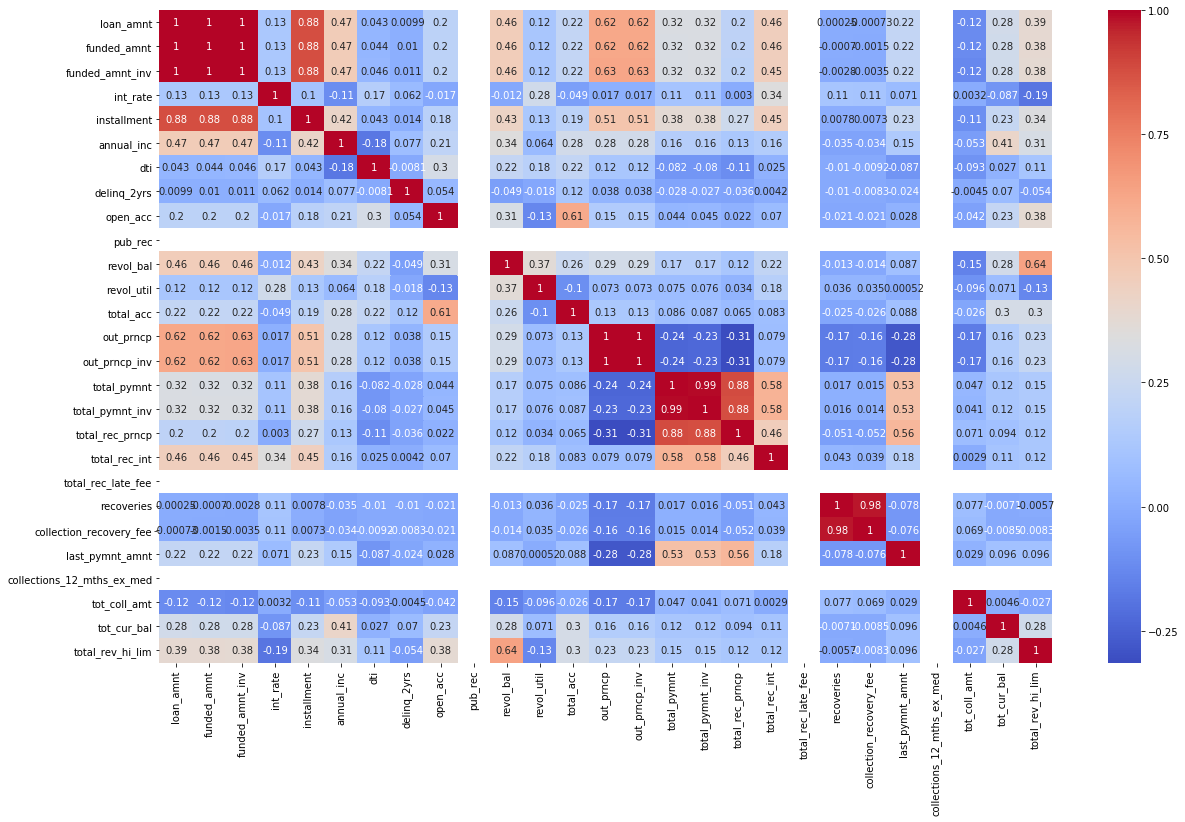

In [89]:
#calculating correlation among numeric variable 
corr_matrix = dataset_numeric.corr() 

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

Selecting the variables that have co-linear relation above certain threshold(0.7 In my case). 

In [90]:
#Create empty array
columns = np.full((corr_matrix.shape[0],), False, dtype=bool)
print(corr_matrix.shape[0])
print(len(dataset_numeric.columns))
print (type(corr_matrix))
#For loop to filter columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
#         print ("matrix vals: ", corr_matrix.iloc[i,j])
        if corr_matrix.iloc[i,j] >= 0.7:
            columns[j] = True
                
# Selected column store into a variable
print (columns)
selected_columns = dataset_numeric.columns[columns]
df_with_droppable_columns = dataset_numeric[selected_columns]
print (len(corr_matrix.columns))
print (len(dataset_numeric.columns))
print (df_with_droppable_columns.columns)
droppable_columns = list(df_with_droppable_columns.columns)
print (droppable_columns)
print (set(dataset_numeric.columns)-set(corr_matrix.columns))


27
27
<class 'pandas.core.frame.DataFrame'>
[False  True  True False  True False False False False False False False
 False False  True False  True  True False False False  True False False
 False False False]
27
27
Index(['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv',
       'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee'],
      dtype='object')
['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee']
set()


Dropping the selected variables.

In [91]:
print(dataset.shape)
dataset.drop(['funded_amnt', 'funded_amnt_inv', 'installment',
              'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee',
              'pub_rec','total_rec_late_fee','collections_12_mths_ex_med'],axis=1, inplace=True)
print(dataset.shape)

(855969, 36)
(855969, 26)


In [92]:
#-------------------------------------------------------------------------------------------------#
#--------------------------------Bivariate Analysis-----------------------------------------------#
#-------------------------------------------------------------------------------------------------#

##### For Varification status

verification_status  default_ind
Not Verified         0              245256
                     1               12486
Source Verified      0              303976
                     1               14202
Verified             0              260270
                     1               19779
Name: default_ind, dtype: int64


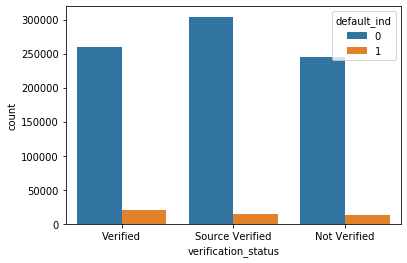

In [93]:
df=dataset.groupby('verification_status')
df_count=df['default_ind'].value_counts()
print(df_count)
sns.countplot('verification_status',data=dataset,hue='default_ind')

In [94]:
# Dummifying Varification status
df=pd.get_dummies(dataset['verification_status'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['verification_status']

##### For initial_list status

initial_list_status  default_ind
f                    0              408954
                     1               33601
w                    0              400548
                     1               12866
Name: default_ind, dtype: int64


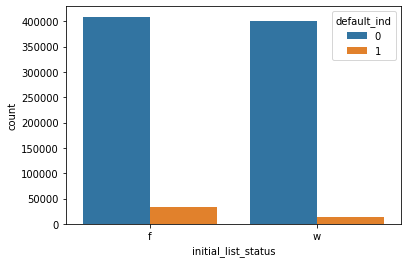

In [95]:
df=dataset.groupby('initial_list_status')
df_count=df['default_ind'].value_counts()
print(df_count)
sns.countplot('initial_list_status',data=dataset,hue='default_ind')

In [96]:
# Dummifying Initial list status
df=pd.get_dummies(dataset['initial_list_status'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['initial_list_status']

##### For Term status

term        default_ind
 36 months  0              570423
            1               29798
 60 months  0              239079
            1               16669
Name: default_ind, dtype: int64


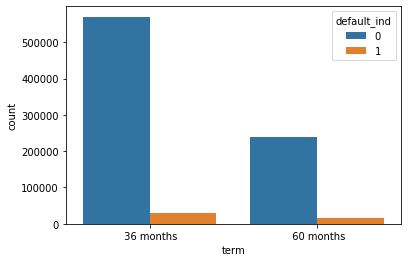

In [97]:
df=dataset.groupby('term')
df_count=df['default_ind'].value_counts()
print(df_count)
sns.countplot('term',data=dataset,hue='default_ind')

In [98]:
# Dummifying Varification status
df=pd.get_dummies(dataset['term'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['term']

##### For Grade value.

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64


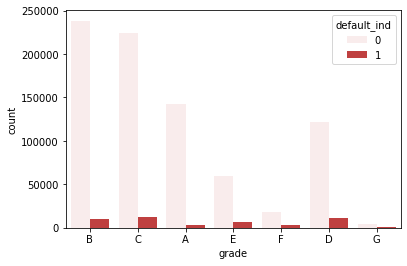

In [99]:
grade_counts=dataset['grade'].value_counts()
print(grade_counts)
sns.countplot('grade',data=dataset,hue='default_ind',color='red',saturation=0.5)

In [100]:
# Dummifying Grade status
df=pd.get_dummies(dataset['grade'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['grade']

##### For home ownership

home_ownership  default_ind
ANY             0                   3
MORTGAGE        0              408730
                1               20376
NONE            0                  38
                1                   7
OTHER           0                 117
                1                  27
OWN             0               80001
                1                4135
RENT            0              320613
                1               21922
Name: default_ind, dtype: int64


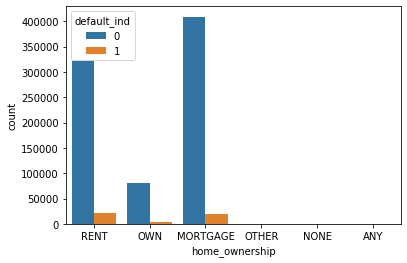

In [101]:
df=dataset.groupby('home_ownership')
df=df['default_ind'].value_counts()
print(df)
sns.countplot('home_ownership',data=dataset,hue='default_ind')

In [102]:
dataset['home_ownership'] = np.where(dataset['home_ownership']=='NONE', 'OTHER', dataset['home_ownership'])
dataset['home_ownership'] = np.where(dataset['home_ownership']=='OTHER', 'OTHER', dataset['home_ownership'])
dataset['home_ownership'] = np.where(dataset['home_ownership']=='ANY', 'OTHER', dataset['home_ownership'])
dataset['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          192
Name: home_ownership, dtype: int64

In [103]:
# Dummy variable.
df=pd.get_dummies(dataset['home_ownership'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['home_ownership']

###### For emp_length

emp_length  default_ind
0           0               40465
            1                2596
1 year      0               51796
            1                3059
10+ years   0              268582
            1               13508
2 years     0               71867
            1                4119
3 years     0               63754
            1                3638
4 years     0               47802
            1                2841
5 years     0               50532
            1                3280
6 years     0               38688
            1                2758
7 years     0               40531
            1                2673
8 years     0               40194
            1                2227
9 years     0               31636
            1                1826
< 1 year    0               63655
            1                3942
Name: default_ind, dtype: int64


[Text(0, 0, '10+ years'),
 Text(0, 0, '< 1 year'),
 Text(0, 0, '1 year'),
 Text(0, 0, '3 years'),
 Text(0, 0, '8 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '4 years'),
 Text(0, 0, '5 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '2 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '0')]

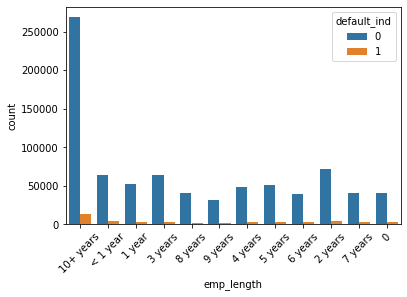

In [104]:

df=dataset.groupby('emp_length')
df=df['default_ind'].value_counts()
print(df)
g=sns.countplot('emp_length',data=dataset,hue='default_ind')
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [105]:
# Dummy variable.
df=pd.get_dummies(dataset['emp_length'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['emp_length']

##### For Purpose.

purpose             default_ind
car                 0                8135
                    1                 458
credit_card         0              192085
                    1                8059
debt_consolidation  0              477003
                    1               28389
educational         0                 270
                    1                  56
home_improvement    0               47640
                    1                2316
house               0                3220
                    1                 293
major_purchase      0               15699
                    1                 888
medical             0                7609
                    1                 584
moving              0                4724
                    1                 436
other               0               37948
                    1                3001
renewable_energy    0                 495
                    1                  54
small_business      0                8395
  

[Text(0, 0, 'credit_card'),
 Text(0, 0, 'car'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'other'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'educational')]

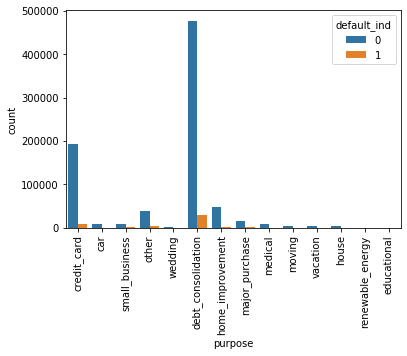

In [106]:
df=dataset.groupby('purpose')
df=df['default_ind'].value_counts()
print(df)
g=sns.countplot('purpose',data=dataset,hue='default_ind')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [107]:
# Dummy variable.
df=pd.get_dummies(dataset['purpose'],drop_first=True)
dataset=pd.concat([df,dataset],axis=1)
del dataset['purpose']

### Split Train and Test data with issue_d date.

In [108]:
dataset.issue_d=pd.to_datetime(dataset.issue_d,infer_datetime_format=True)
col_name='issue_d'
print(dataset[col_name].dtype)

datetime64[ns]


In [109]:
split_data="2015-06-01"
Training=dataset[dataset['issue_d']<split_data]
Training.shape

(598978, 56)

In [110]:
Testing=dataset.loc[dataset['issue_d']>='2015-06-01',:]
Testing.shape

(256991, 56)

In [111]:
Training=Training.drop(['issue_d'],axis=1)
Testing=Testing.drop(['issue_d'],axis=1)

In [112]:
Testing['default_ind'].value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [113]:
X_train = Training.values[:,:-1]
Y_train = Training.values[:,-1]
X_test = Testing.values[:,:-1]
Y_test = Testing.values[:,-1]

Using SMOTE to handle the clas imbalance problem.

In [114]:
# import SMOTE
from imblearn.over_sampling import SMOTE

# Create the OverSampling object 'os'
os = SMOTE(random_state=0)

In [115]:
# Create over sampled datasets
os_data_X,os_data_y=os.fit_sample(X_train, Y_train)


In [116]:
# Just convert them into data frames
print (type(X_train))
os_data_X = pd.DataFrame(data=os_data_X)
print (os_data_X.shape)
os_data_y= pd.DataFrame(data=os_data_y,columns=['label'])

<class 'numpy.ndarray'>
(1105644, 54)


In [117]:
# we can Check the numbers of our data
# print("Let us see if the classes are imbalanced \n", Y_train.value_counts())
print("length of original training data is ",len(X_train))
print("length of oversampled data is ",len(os_data_X))
print("Number of non-diabetic in oversampled data",len(os_data_y[os_data_y['label']==0]))
print("Number of diabetic",len(os_data_y[os_data_y['label']==1]))
print("Proportion of non-diabetic data in oversampled data is ",len(os_data_y[os_data_y['label']==0])/len(os_data_X))
print("Proportion of diabetic data in oversampled data is ",len(os_data_y[os_data_y['label']==1])/len(os_data_X))

length of original training data is  598978
length of oversampled data is  1105644
Number of non-diabetic in oversampled data 552822
Number of diabetic 552822
Proportion of non-diabetic data in oversampled data is  0.5
Proportion of diabetic data in oversampled data is  0.5


#### Scaling the data.

In [118]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[ 1.84718731 -1.21108497 -0.02333574 ...  1.82877511  0.17735558
   0.37481691]
 [-0.54136362 -1.21108497 -0.02333574 ...  1.82877511  0.17735558
   0.37481691]
 [-0.54136362 -1.21108497 -0.02333574 ...  1.82877511  0.17735558
   0.37481691]
 ...
 [-0.54136362  0.8257059  -0.02333574 ... -0.54681409 -0.85707166
  -0.5870109 ]
 [-0.54136362  0.8257059  -0.02333574 ... -0.54681409 -0.61959716
   0.02416605]
 [ 1.84718731 -1.21108497 -0.02333574 ... -0.54681409 -0.86560467
   1.02242174]]
[[ 1.84718731 -1.21108497 -0.02333574 ... -0.54681409  3.02910448
   1.28047423]
 [-0.54136362  0.8257059  -0.02333574 ...  1.82877511 -0.83680207
   0.53348018]
 [ 1.84718731 -1.21108497 -0.02333574 ... -0.54681409 -0.65090774
   1.12428456]
 ...
 [-0.54136362  0.8257059  -0.02333574 ... -0.54681409  0.17735315
   1.55889929]
 [ 1.84718731 -1.21108497 -0.02333574 ... -0.54681409  0.44561901
   1.16502969]
 [-0.54136362  0.8257059  -0.02333574 ... -0.54681409  0.46443866
   0.37477789]]


In [119]:
Y_train_scaled=Y_train.astype(int)
Y_test_scaled=Y_test.astype(int)

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#### Creating a function for plotting confusion matrix.

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Building Logistic model

In [122]:
#creating a base model first
classifier_base = LogisticRegression(random_state=0,solver='liblinear')
classifier_base.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

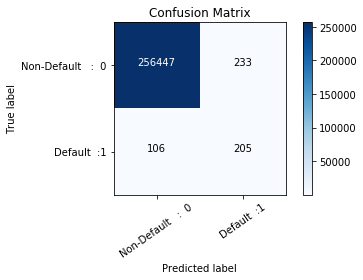

Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       0.47      0.66      0.55       311

    accuracy                           1.00    256991
   macro avg       0.73      0.83      0.77    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9986808876575445


In [123]:
# Predicting the test set results and creating confusion matrix
# The confusion_matrix() function will calculate a confusion matrix 
# and return the result as an array.
y_pred_base = classifier_base.predict(X_test)
y_pred_prob_base = classifier_base.predict_proba(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_base = confusion_matrix(Y_test,y_pred_base)
plot_confusion_metrix(conf_matrix_base,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_base))

acc_base= accuracy_score(Y_test,y_pred_base)
print("Accuracy of the model:", acc_base)



In [124]:
# Smote.
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
# Create over sampled datasets
os_scaled_X,os_scaled_y=os.fit_sample(X_train_scaled, Y_train_scaled)
# Just convert them into data frames
print (type(X_train_scaled))
os_scaled_X = pd.DataFrame(data=os_scaled_X)
print (os_scaled_X.shape)
os_scaled_y= pd.DataFrame(data=os_scaled_y,columns=['label'])




<class 'numpy.ndarray'>
(1105644, 54)


In [125]:
classifier_scaled_smote = LogisticRegression(random_state=0,solver='liblinear')
classifier_scaled_smote.fit(os_scaled_X, os_scaled_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred_scaled_smote = classifier_scaled_smote.predict(X_test_scaled)
y_pred_prob_scaled_smote = classifier_scaled_smote.predict_proba(X_test_scaled)



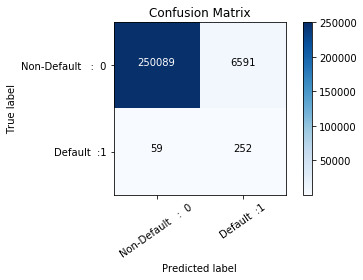

Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    256680
           1       0.04      0.81      0.07       311

    accuracy                           0.97    256991
   macro avg       0.52      0.89      0.53    256991
weighted avg       1.00      0.97      0.99    256991

Accuracy of the model: 0.9741236074415057


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled,y_pred_scaled_smote).ravel()
conf_matrix_scaled_smote = confusion_matrix(Y_test_scaled,y_pred_scaled_smote)
plot_confusion_metrix(conf_matrix_scaled_smote,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,y_pred_scaled_smote))

acc_scaled_smote= accuracy_score(Y_test_scaled,y_pred_scaled_smote)
print("Accuracy of the model:", acc_scaled_smote)

In [128]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test_scaled,y_pred_scaled_smote)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.892305751102252
[0.         0.02567789 1.        ]
[0.         0.81028939 1.        ]


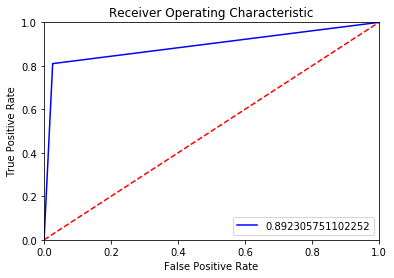

In [129]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

##### Tuning Model

In [130]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier_scaled_smote.predict_proba(X_test_scaled)
print("   class : 0  class: 1  ")
print(y_pred_prob_scaled_smote)

   class : 0  class: 1  
[[9.99994987e-01 5.01332919e-06]
 [9.97930789e-01 2.06921119e-03]
 [8.92168744e-01 1.07831256e-01]
 ...
 [9.99950747e-01 4.92525014e-05]
 [9.99978107e-01 2.18928391e-05]
 [9.99887545e-01 1.12454720e-04]]


In [131]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.8:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

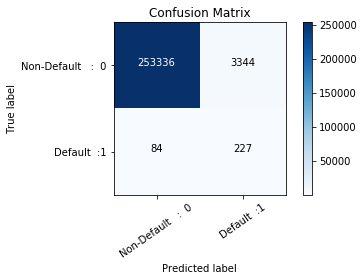

Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    256680
           1       0.06      0.73      0.12       311

    accuracy                           0.99    256991
   macro avg       0.53      0.86      0.56    256991
weighted avg       1.00      0.99      0.99    256991

Accuracy of the model: 0.98666101147511


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled,y_pred_class).ravel()
conf_matrix = confusion_matrix(Y_test_scaled,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,y_pred_class))

acc= accuracy_score(Y_test_scaled,y_pred_class)
print("Accuracy of the model:", acc)

In [133]:
#Sensitivity.
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.729903536977492


In [134]:
#Specificity.
specificity = TN / (TN + FP)
print(specificity)


0.9869721053451769


In [135]:
#Precision.
precision = TP / float(TP + FP)
print(precision)


0.06356762811537385


In [136]:
#False Possitive Rate.
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)


0.013027894654823126


##### Cross Validation

In [137]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]
seed=7
scoring='accuracy'
kfold=KFold(n_splits=5,random_state=seed)
cv_result=cross_val_score(classifier_scaled_smote,os_scaled_X, os_scaled_y,cv=kfold,scoring=scoring)
result.append(cv_result)
print("%f %f" % (cv_result.mean(),cv_result.std()))

0.922104 0.049580


### Decision Tree 


In [138]:
# Base Model.
from sklearn.tree import DecisionTreeClassifier
model_DT_base = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')
#default criterion is gini
model_DT_base.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [139]:
Y_pred_base = model_DT_base.predict(X_test)

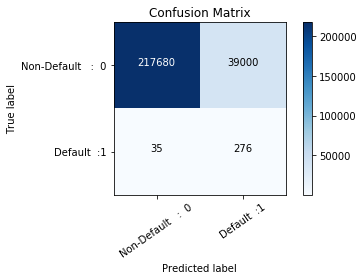

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92    256680
         1.0       0.01      0.89      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.87      0.47    256991
weighted avg       1.00      0.85      0.92    256991

Accuracy of the model: 0.8481075212750641


In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_base = confusion_matrix(Y_test, Y_pred_base)
plot_confusion_metrix(conf_matrix_base,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test, Y_pred_base))

acc_base= accuracy_score(Y_test, Y_pred_base)
print("Accuracy of the model:", acc_base)

In [141]:
# scaled Model.
from sklearn.tree import DecisionTreeClassifier
model_DT_scaled = DecisionTreeClassifier(random_state=10,min_samples_leaf=100,max_depth=25,criterion='gini')
#default criterion is gini
model_DT_scaled.fit(X_train_scaled,Y_train_scaled)
Y_pred_scaled = model_DT_scaled.predict(X_test_scaled)

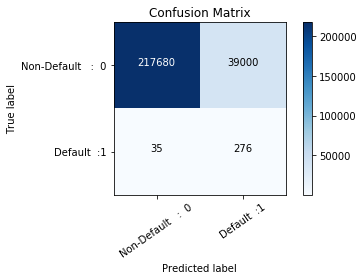

Classification report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    256680
           1       0.01      0.89      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.87      0.47    256991
weighted avg       1.00      0.85      0.92    256991

Accuracy of the model: 0.8481075212750641


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_scaled = confusion_matrix(Y_test_scaled, Y_pred_scaled)
plot_confusion_metrix(conf_matrix_scaled,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled, Y_pred_scaled))

acc_scaled= accuracy_score(Y_test_scaled, Y_pred_scaled)
print("Accuracy of the model:", acc_scaled)

In [143]:
# after solving class immbalance.
from sklearn.tree import DecisionTreeClassifier
model_DT_smote = DecisionTreeClassifier(random_state=20,min_samples_leaf=250,max_depth=30,criterion='gini')
#default criterion is gini
model_DT_smote.fit(os_scaled_X, os_scaled_y)
Y_pred_smote = model_DT_smote.predict(X_test_scaled)

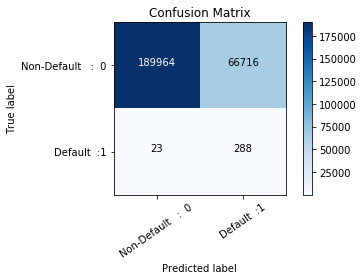

Classification report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    256680
           1       0.00      0.93      0.01       311

    accuracy                           0.74    256991
   macro avg       0.50      0.83      0.43    256991
weighted avg       1.00      0.74      0.85    256991

Accuracy of the model: 0.7403060807576919


In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled, Y_pred_smote).ravel()
conf_matrix_smote = confusion_matrix(Y_test_scaled, Y_pred_smote)
plot_confusion_metrix(conf_matrix_smote,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled, Y_pred_smote))

acc_smote= accuracy_score(Y_test_scaled, Y_pred_smote)
print("Accuracy of the model:", acc_smote)

In [145]:
#Sensitivity.
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9260450160771704


In [146]:
#Specificity.
specificity = TN / (TN + FP)
print(specificity)


0.7400810347514415


In [147]:
#Precision.
precision = TP / float(TP + FP)
print(precision)


0.004298250850695481


In [148]:
#False Possitive Rate.
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)


0.2599189652485585


In [149]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test_scaled, Y_pred_smote)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8330630254143059
[0.         0.25991897 1.        ]
[0.         0.92604502 1.        ]


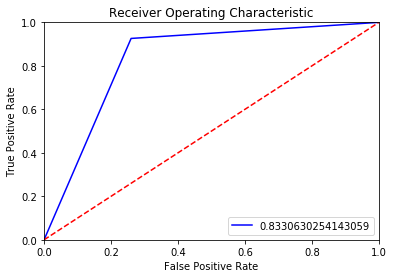

In [150]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [151]:
#Tuning Based on ROC Curve.
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob_DT = model_DT_smote.predict_proba(X_test_scaled)
print("   class : 0  class: 1  ")
print(y_pred_prob_DT)

   class : 0  class: 1  
[[0.75793651 0.24206349]
 [0.18681319 0.81318681]
 [0.75793651 0.24206349]
 ...
 [1.         0.        ]
 [0.9962406  0.0037594 ]
 [1.         0.        ]]


In [152]:
y_pred_class=[]
for value in y_pred_prob_DT[:,1]:
    if value > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

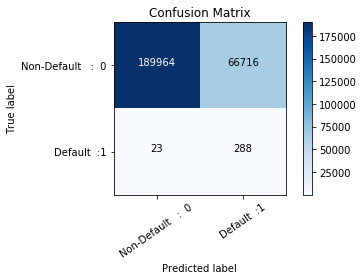

Classification report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    256680
           1       0.00      0.93      0.01       311

    accuracy                           0.74    256991
   macro avg       0.50      0.83      0.43    256991
weighted avg       1.00      0.74      0.85    256991

Accuracy of the model: 0.7403060807576919


In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test_scaled,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,y_pred_class))

acc= accuracy_score(Y_test_scaled,y_pred_class)
print("Accuracy of the model:", acc)

In [154]:
kfold=KFold(n_splits=5,random_state=seed)
cv_result_DT=cross_val_score(model_DT_smote,os_scaled_X, os_scaled_y,cv=kfold,scoring=scoring)
result.append(cv_result)
print("%f %f" % (cv_result.mean(),cv_result.std()))

0.922104 0.049580


## ADA Booster Classifier

In [155]:
# Base Model
from sklearn.ensemble import AdaBoostClassifier
ada_model_base=AdaBoostClassifier()
ada_model_base.fit(X_train,Y_train)
Y_pred_base=ada_model_base.predict(X_test)

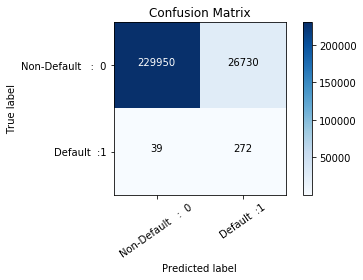

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94    256680
         1.0       0.01      0.87      0.02       311

    accuracy                           0.90    256991
   macro avg       0.50      0.89      0.48    256991
weighted avg       1.00      0.90      0.94    256991

Accuracy of the model: 0.8958368191882206


In [156]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_base = confusion_matrix(Y_test,Y_pred_base)
plot_confusion_metrix(conf_matrix_base,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred_base))

acc= accuracy_score(Y_test,Y_pred_base)
print("Accuracy of the model:", acc)

In [157]:
# Scaled Model
from sklearn.ensemble import AdaBoostClassifier
ada_model_scaled=AdaBoostClassifier()
ada_model_scaled.fit(X_train_scaled,Y_train_scaled)
Y_pred_scaled=ada_model_scaled.predict(X_test_scaled)

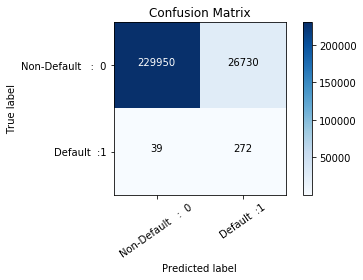

Classification report
              precision    recall  f1-score   support

           0       1.00      0.90      0.94    256680
           1       0.01      0.87      0.02       311

    accuracy                           0.90    256991
   macro avg       0.50      0.89      0.48    256991
weighted avg       1.00      0.90      0.94    256991

Accuracy of the model: 0.8958368191882206


In [158]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_scaled = confusion_matrix(Y_test_scaled,Y_pred_scaled)
plot_confusion_metrix(conf_matrix_scaled,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,Y_pred_scaled))

acc= accuracy_score(Y_test_scaled,Y_pred_scaled)
print("Accuracy of the model:", acc)

In [159]:
# os Model
from sklearn.ensemble import AdaBoostClassifier
ada_model_smote=AdaBoostClassifier()
ada_model_smote.fit(os_scaled_X, os_scaled_y)
Y_pred_smote=ada_model_smote.predict(X_test_scaled)

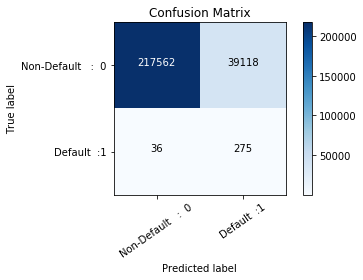

Classification report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    256680
           1       0.01      0.88      0.01       311

    accuracy                           0.85    256991
   macro avg       0.50      0.87      0.47    256991
weighted avg       1.00      0.85      0.92    256991

Accuracy of the model: 0.8476444700398068


In [160]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled, Y_pred_smote).ravel()
conf_matrix_smote = confusion_matrix(Y_test_scaled,Y_pred_smote)
plot_confusion_metrix(conf_matrix_smote,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,Y_pred_smote))

acc= accuracy_score(Y_test_scaled,Y_pred_smote)
print("Accuracy of the model:", acc)

In [161]:
#Sensitivity.
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.8842443729903537


In [162]:
#Specificity.
specificity = TN / (TN + FP)
print(specificity)


0.8476001246688484


In [163]:
#Precision.
precision = TP / float(TP + FP)
print(precision)


0.006980935699235905


In [164]:
#False Possitive Rate.
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)


0.15239987533115162


In [165]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test_scaled , Y_pred_smote)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.865922248829601
[0.         0.15239988 1.        ]
[0.         0.88424437 1.        ]


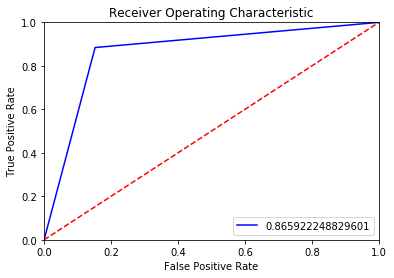

In [166]:
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

##### Gradient Boosting

In [167]:
# Base Model
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting_base=GradientBoostingClassifier(n_estimators=30)


#fit the model on the data and predict the values
model_GradientBoosting_base.fit(X_train,Y_train)

Y_pred_base=model_GradientBoosting_base.predict(X_test)

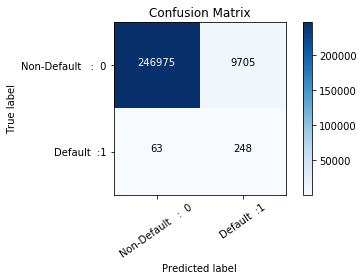

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    256680
         1.0       0.02      0.80      0.05       311

    accuracy                           0.96    256991
   macro avg       0.51      0.88      0.51    256991
weighted avg       1.00      0.96      0.98    256991

Accuracy of the model: 0.9619908868403952


In [168]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_base = confusion_matrix(Y_test,Y_pred_base)
plot_confusion_metrix(conf_matrix_base,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred_base))

acc_base= accuracy_score(Y_test,Y_pred_base)
print("Accuracy of the model:", acc_base)

In [169]:
# os Model
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting_os=GradientBoostingClassifier(n_estimators=100)


#fit the model on the data and predict the values
model_GradientBoosting_os.fit(os_scaled_X, os_scaled_y)

Y_pred_os=model_GradientBoosting_os.predict(X_test_scaled)

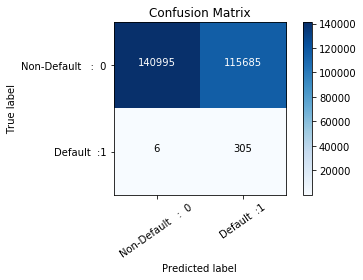

Classification report
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.55    256991
   macro avg       0.50      0.77      0.36    256991
weighted avg       1.00      0.55      0.71    256991

Accuracy of the model: 0.5498247020323669


In [170]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled,Y_pred_os).ravel()
conf_matrix_os = confusion_matrix(Y_test_scaled,Y_pred_os)
plot_confusion_metrix(conf_matrix_os,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,Y_pred_os))

acc_os= accuracy_score(Y_test_scaled,Y_pred_os)
print("Accuracy of the model:", acc_os)

In [171]:
#Sensitivity.
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9807073954983923


In [172]:
#Specificity.
specificity = TN / (TN + FP)
print(specificity)


0.5493026336294219


In [173]:
#Precision.
precision = TP / float(TP + FP)
print(precision)


0.002629537029054229


In [174]:
#False Possitive Rate.
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)


0.45069736637057817


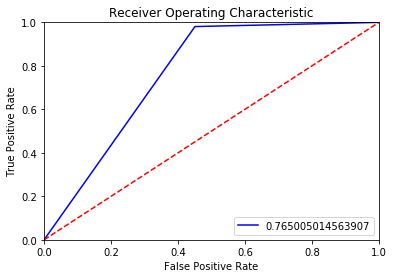

In [175]:
from sklearn import metrics
fpr , tpr , z = metrics.roc_curve(Y_test_scaled , Y_pred_os)
auc = metrics.auc(fpr,tpr)
#ROC curve
import matplotlib.pyplot as plt 
#%matplotlib inline 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [177]:
# Base Model
from xgboost import XGBClassifier

XGB_base = XGBClassifier()


#fit the model on the data and predict the values
XGB_base.fit(X_train, Y_train)

Y_pred_base=XGB_base.predict(X_test)

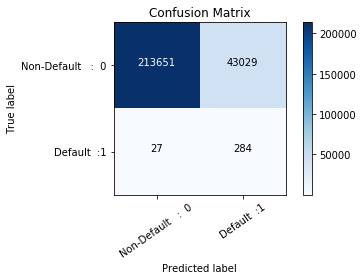

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    256680
         1.0       0.01      0.91      0.01       311

    accuracy                           0.83    256991
   macro avg       0.50      0.87      0.46    256991
weighted avg       1.00      0.83      0.91    256991

Accuracy of the model: 0.8324610589475896


In [178]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix_base = confusion_matrix(Y_test,Y_pred_base)
plot_confusion_metrix(conf_matrix_base,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred_base))

acc_base= accuracy_score(Y_test,Y_pred_base)
print("Accuracy of the model:", acc_base)

In [181]:
# os Model
from xgboost import XGBClassifier

XGB_os = XGBClassifier()


#fit the model on the data and predict the values
XGB_os.fit(os_scaled_X, os_scaled_y)

Y_pred_os=XGB_os.predict(X_test_scaled)

ValueError: feature_names mismatch: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53']
expected 37, 18, 6, 13, 34, 7, 25, 47, 52, 14, 21, 38, 20, 8, 16, 23, 9, 49, 31, 29, 26, 32, 33, 11, 36, 3, 0, 22, 35, 50, 45, 5, 19, 2, 30, 10, 42, 15, 46, 4, 12, 43, 44, 24, 17, 28, 40, 39, 27, 48, 51, 1, 53, 41 in input data
training data did not have the following fields: f15, f30, f45, f22, f48, f34, f9, f53, f21, f23, f3, f14, f1, f17, f36, f7, f51, f16, f25, f20, f27, f38, f18, f42, f26, f8, f6, f46, f39, f47, f32, f10, f4, f11, f12, f40, f31, f24, f35, f13, f50, f28, f49, f5, f44, f37, f41, f2, f0, f19, f33, f52, f43, f29

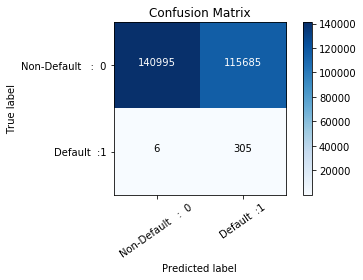

Classification report
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    256680
           1       0.00      0.98      0.01       311

    accuracy                           0.55    256991
   macro avg       0.50      0.77      0.36    256991
weighted avg       1.00      0.55      0.71    256991

Accuracy of the model: 0.5498247020323669


In [180]:
#checking result
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report
TN, FP, FN, TP = confusion_matrix(Y_test_scaled,Y_pred_os).ravel()
conf_matrix_os = confusion_matrix(Y_test_scaled,Y_pred_os)
plot_confusion_metrix(conf_matrix_os,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test_scaled,Y_pred_os))

acc_os= accuracy_score(Y_test_scaled,Y_pred_os)
print("Accuracy of the model:", acc_os)